<a href="https://colab.research.google.com/github/andersonmoura-cn/Disciplina-ICA/blob/Osvaldo/src/HW1Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregando os três artigos
df_tempo = pd.read_csv('time_domain_features_train.csv')
df_frequencia = pd.read_csv('frequency_domain_features_train.csv')
df_nao_linear = pd.read_csv('heart_rate_non_linear_features_train.csv')


# Juntando os arquivos
df_parcial = df_tempo.merge(df_frequencia, on='uuid', how='inner',validate='one_to_one')
df_completo = df_parcial.merge(df_nao_linear, on='uuid', how='inner',validate='one_to_one')

# 4. Verificando o DataFrame completo
print("\n--- DataFrame mesclado ---")
print(df_completo.head()) # Mostra as 5 primeiras linhas
print(f"\nDimensões do DataFrame completo: {df_completo.shape}")



--- DataFrame mesclado ---
      MEAN_RR   MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0  885.157845  853.763730  140.972741  15.554505  15.553371    9.063146   
1  939.425371  948.357865   81.317742  12.964439  12.964195    6.272369   
2  898.186047  907.006860   84.497236  16.305279  16.305274    5.182201   
3  881.757865  893.460030   90.370537  15.720468  15.720068    5.748591   
4  809.625331  811.184865   62.766242  19.213819  19.213657    3.266724   

          HR      pNN25     pNN50      KURT  ...     HF_NU           TP  \
0  69.499952  11.133333  0.533333 -0.856554  ...  1.514737  3686.666157   
1  64.363150   5.600000  0.000000 -0.408190  ...  0.304603  3006.487251   
2  67.450066  13.066667  0.200000  0.351789  ...  1.049528  2685.879461   
3  68.809562  11.800000  0.133333 -0.504947  ...  1.775294  3434.520980   
4  74.565728  20.200000  0.200000 -0.548408  ...  3.279993  2621.175204   

        LF_HF     HF_LF        SD1         SD2    sampen    higuci  da

In [5]:
# Obter N (linhas) e D (colunas)
N = df_completo.shape[0]
D = df_completo.shape[1]

print(f"Número de observações (N): {N}")
print(f"Número total de colunas (preditores(34) + classe(1) + id's(2) ): {D}")

Número de observações (N): 369289
Número total de colunas (preditores(34) + classe(1) + id's(2) ): 37


In [6]:
# Definir a coluna classe
nome_coluna_classe = 'condition'

# Contar o número de observações para cada classe
distribuicao_classes = df_completo[nome_coluna_classe].value_counts()

# Obter o número de classes únicas (L)
L = len(distribuicao_classes)

print(f"\nNúmero de classes (L): {L}")
print("\nDistribuição das classes:")
print(distribuicao_classes)


Número de classes (L): 3

Distribuição das classes:
condition
no stress        200082
interruption     105150
time pressure     64057
Name: count, dtype: int64


In [13]:
# Remover as colunas não numéricas
df_numerico = df_completo.drop(columns=['uuid', 'datasetId', 'condition'])

# Calcular a média, o desvio padrão, etc.
estatisticas = df_numerico.describe()

# Calcular a assimetria
assimetria = df_numerico.skew()

# Exibir os resultados
print("--- Estatísticas Descritivas ---")
print(estatisticas)

print("\n--- Assimetria---")
print(assimetria)

--- Estatísticas Descritivas ---
             MEAN_RR      MEDIAN_RR           SDRR          RMSSD  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean      846.650104     841.965890     109.352531      14.977498   
std       124.603984     132.321005      77.117025       4.120766   
min       547.492221     517.293295      27.233947       5.529742   
25%       760.228533     755.750735      64.205641      11.830959   
50%       822.951438     819.689595      82.608243      14.415918   
75%       924.117422     916.821570     118.237002      17.927144   
max      1322.016957    1653.122250     563.486949      26.629477   

                SDSD     SDRR_RMSSD             HR          pNN25  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       14.976767       7.396597      73.941824       9.841143   
std         4.120768       5.143834      10.337453       8.195574   
min         5.529630       2.660381      48.737243       0.000000   


--- Análise da variável: MEAN_RR ---


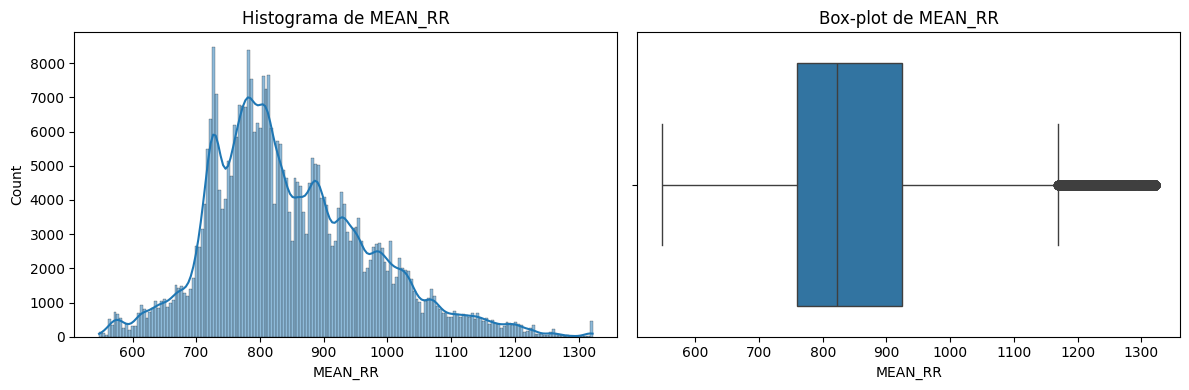

--- Análise da variável: MEDIAN_RR ---


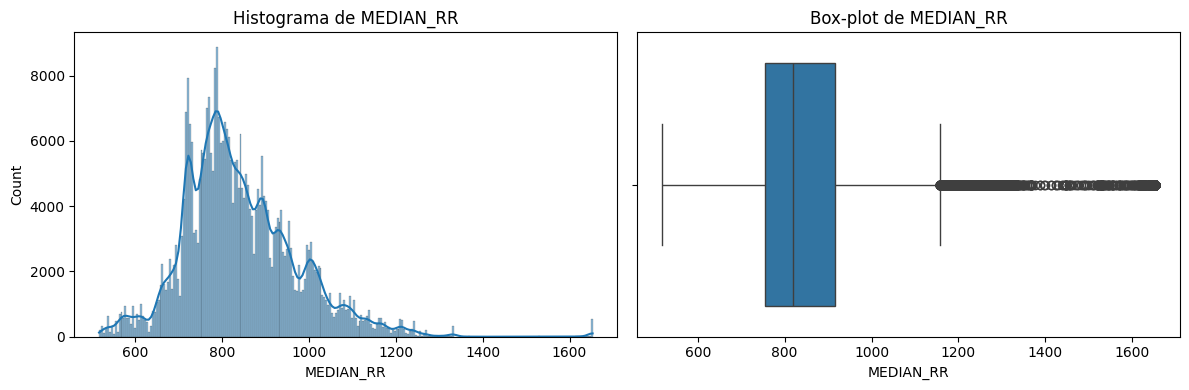

--- Análise da variável: SDRR ---


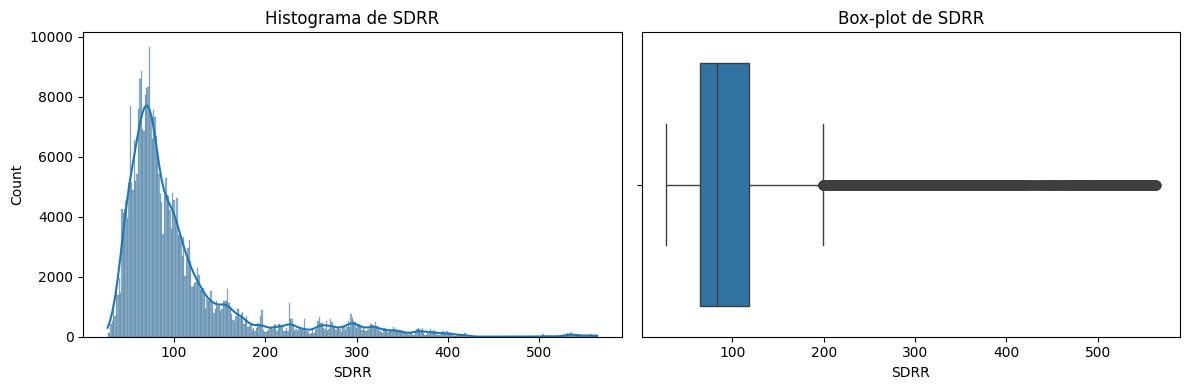

--- Análise da variável: RMSSD ---


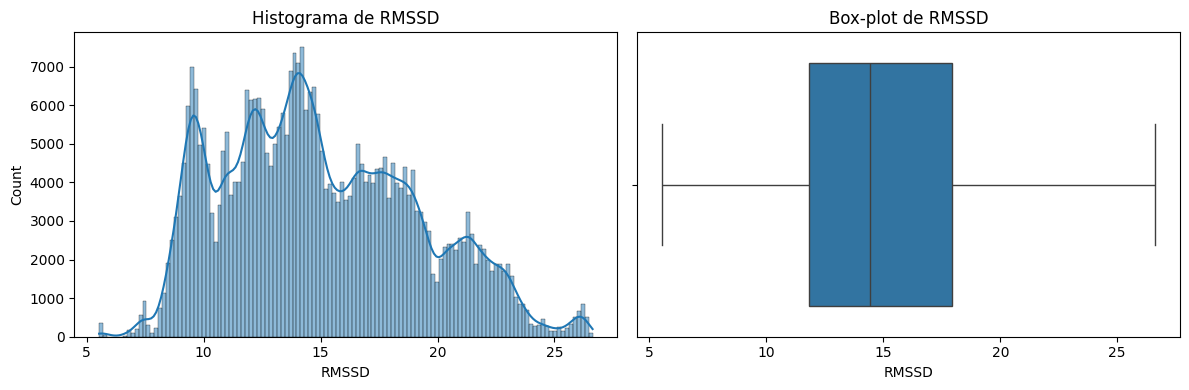

--- Análise da variável: SDSD ---


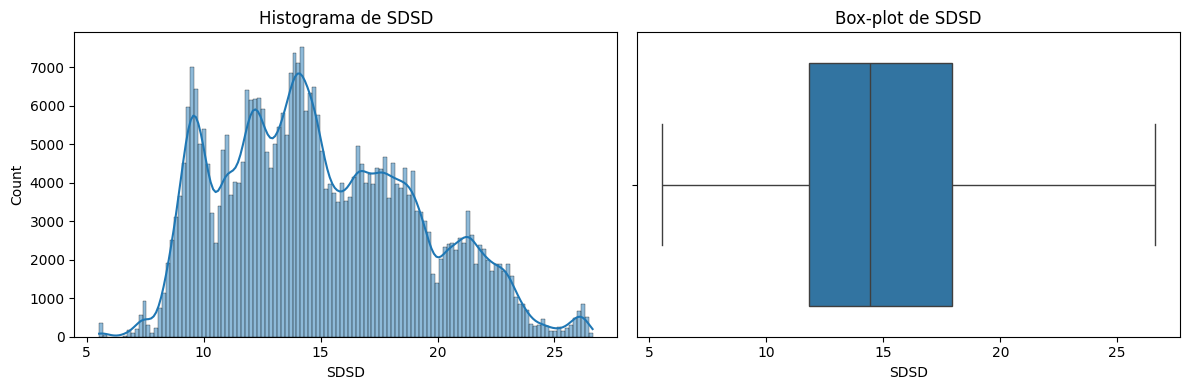

--- Análise da variável: SDRR_RMSSD ---


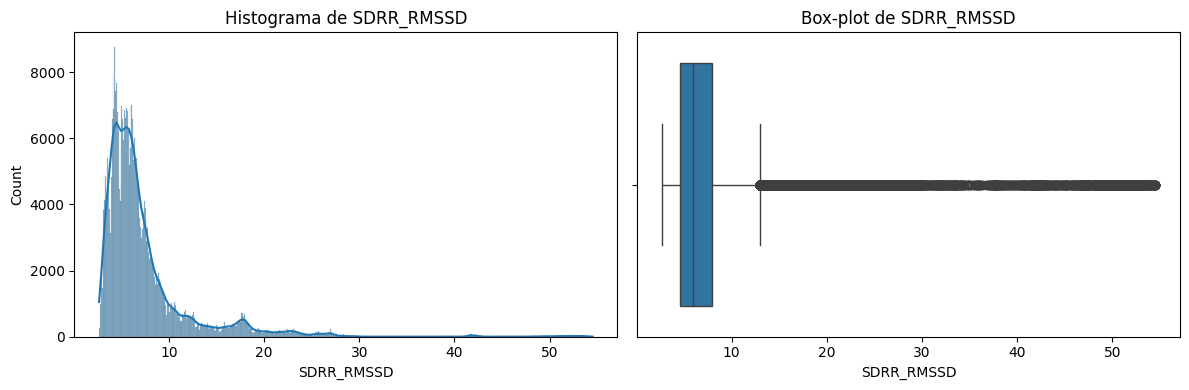

--- Análise da variável: HR ---


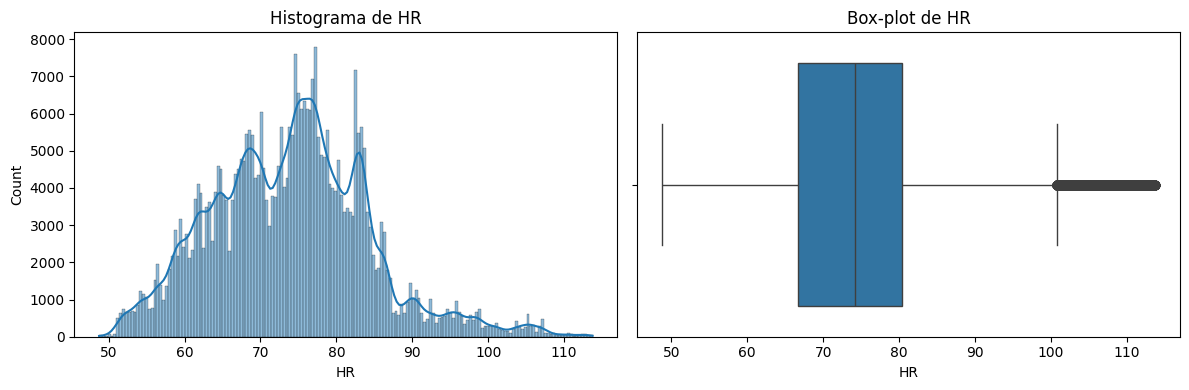

--- Análise da variável: pNN25 ---


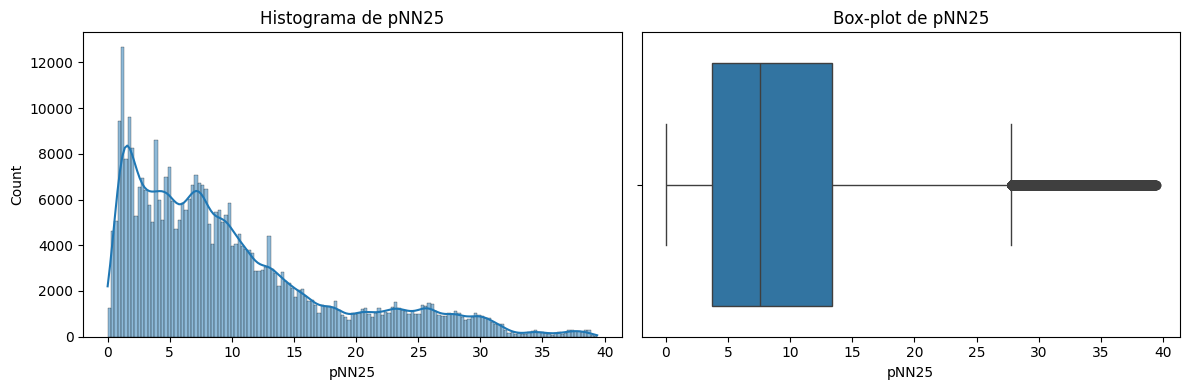

--- Análise da variável: pNN50 ---


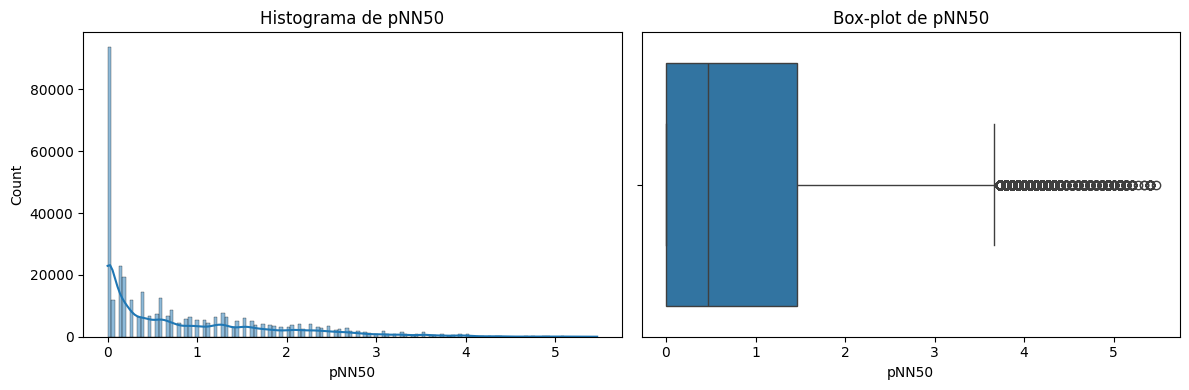

--- Análise da variável: KURT ---


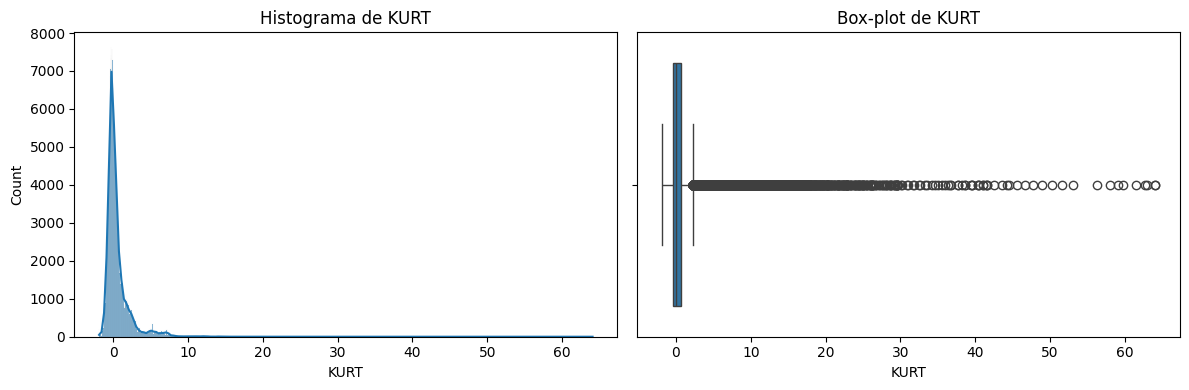

--- Análise da variável: SKEW ---


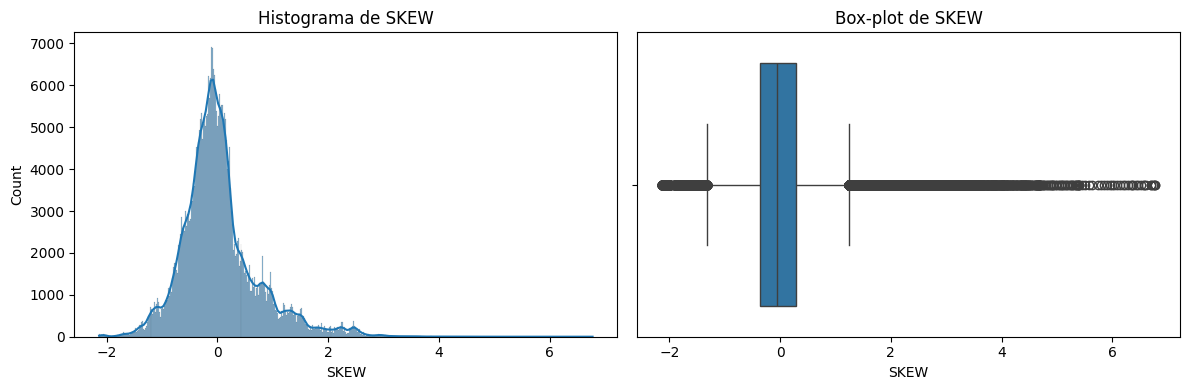

--- Análise da variável: MEAN_REL_RR ---


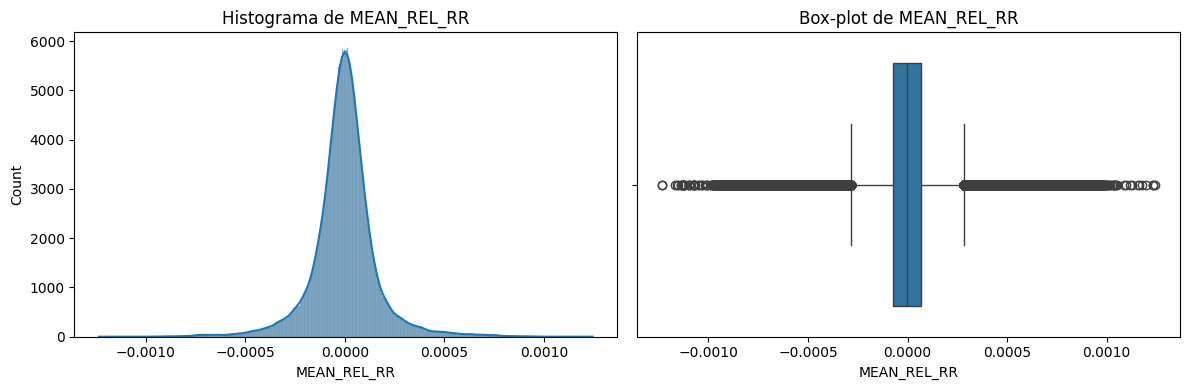

--- Análise da variável: MEDIAN_REL_RR ---


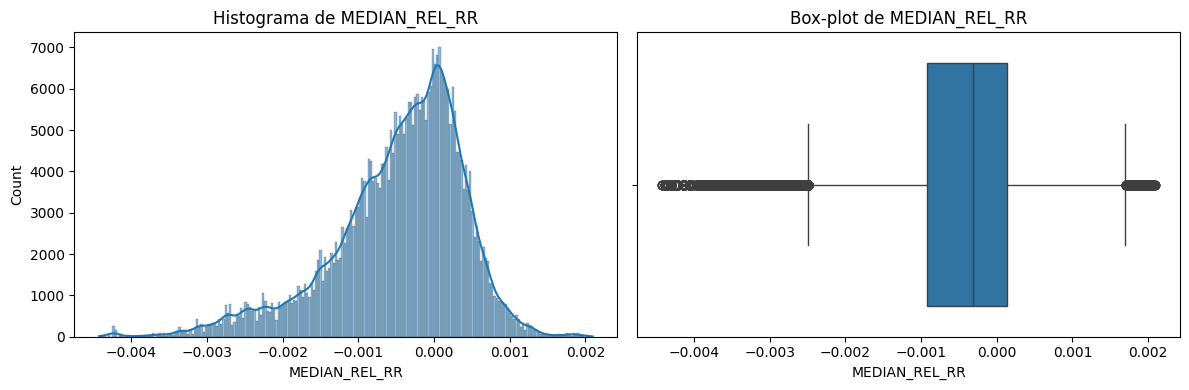

--- Análise da variável: SDRR_REL_RR ---


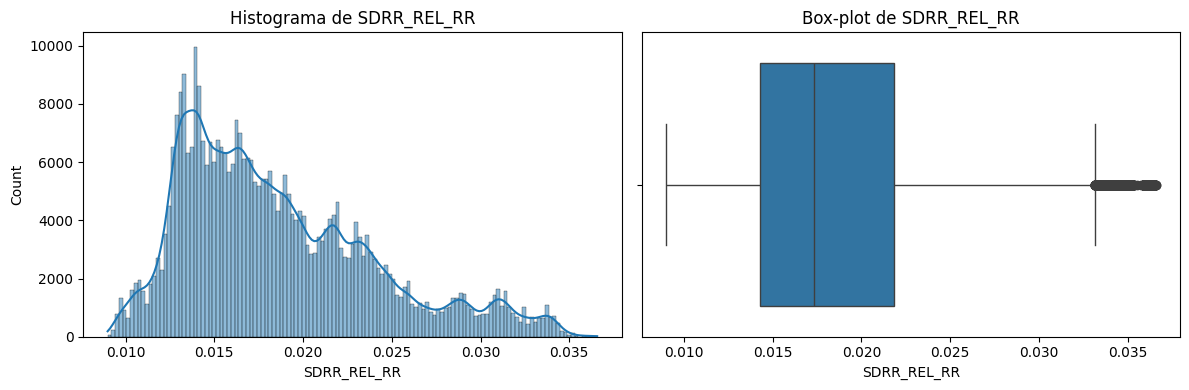

--- Análise da variável: RMSSD_REL_RR ---


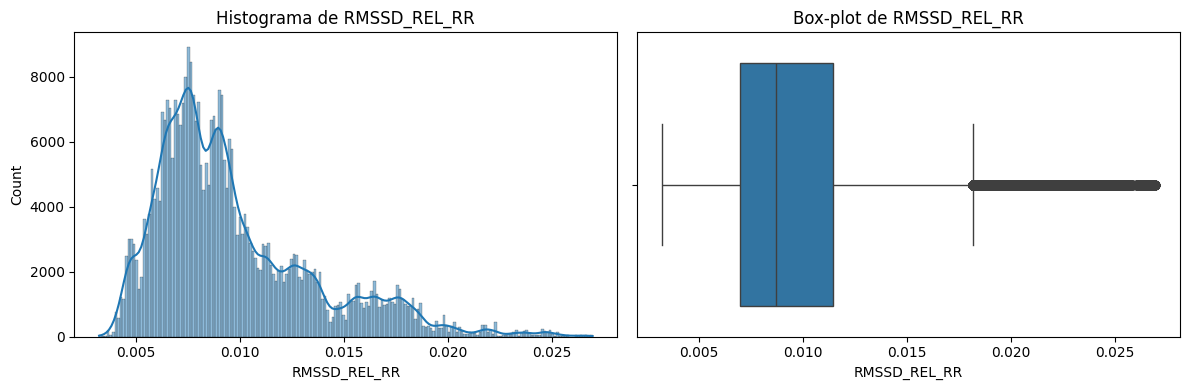

--- Análise da variável: SDSD_REL_RR ---


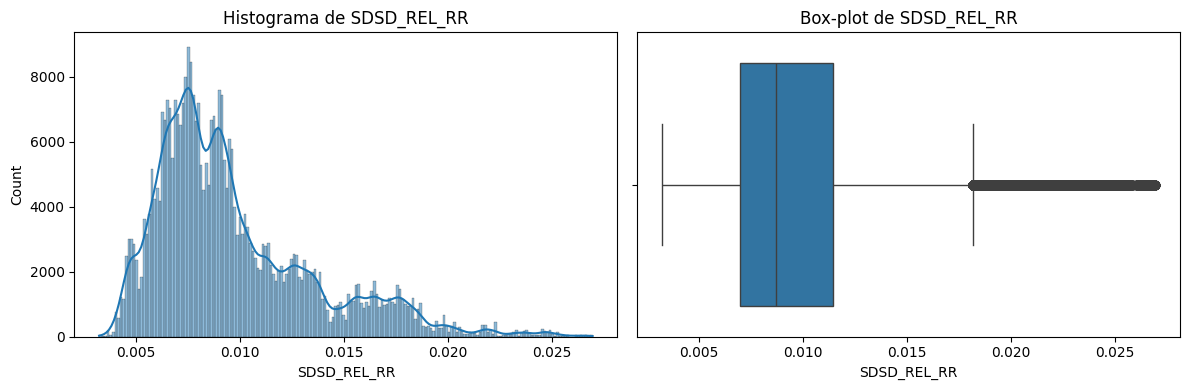

--- Análise da variável: SDRR_RMSSD_REL_RR ---


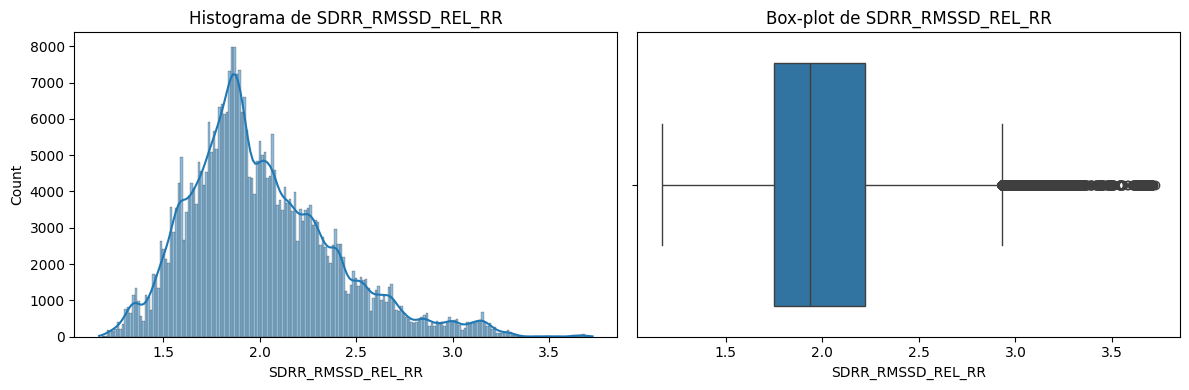

--- Análise da variável: KURT_REL_RR ---


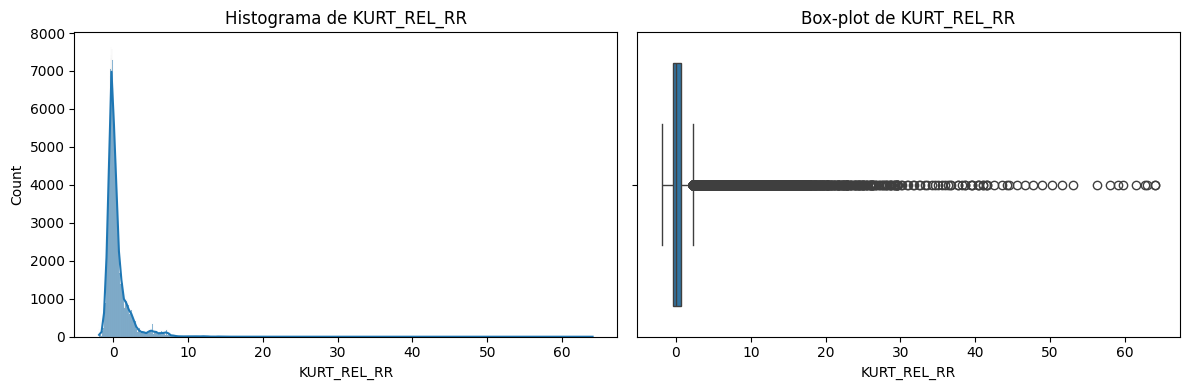

--- Análise da variável: SKEW_REL_RR ---


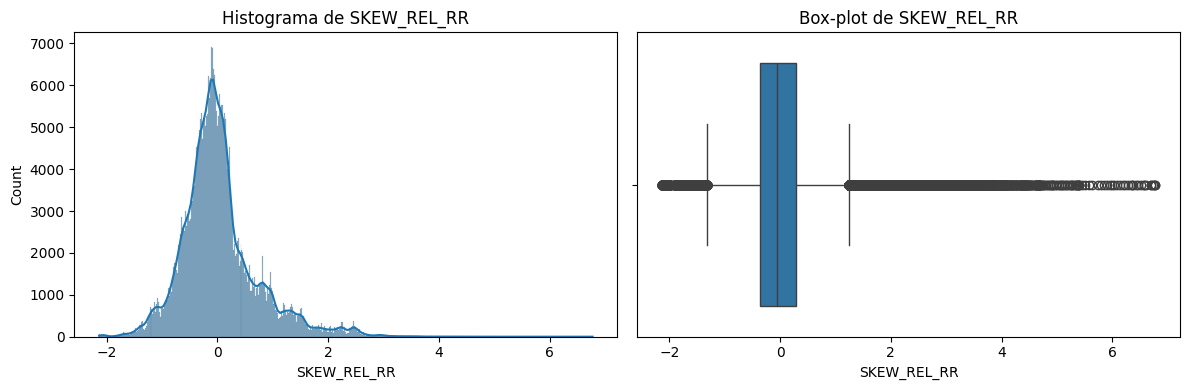

--- Análise da variável: VLF ---


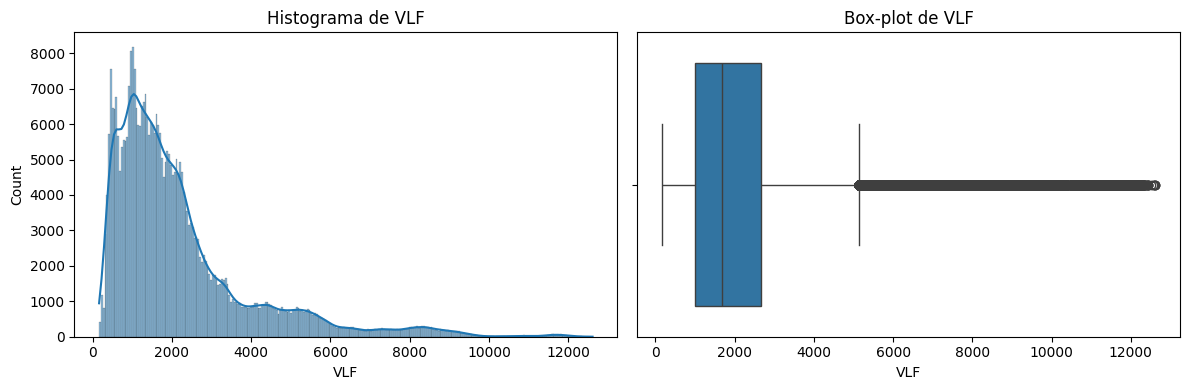

--- Análise da variável: VLF_PCT ---


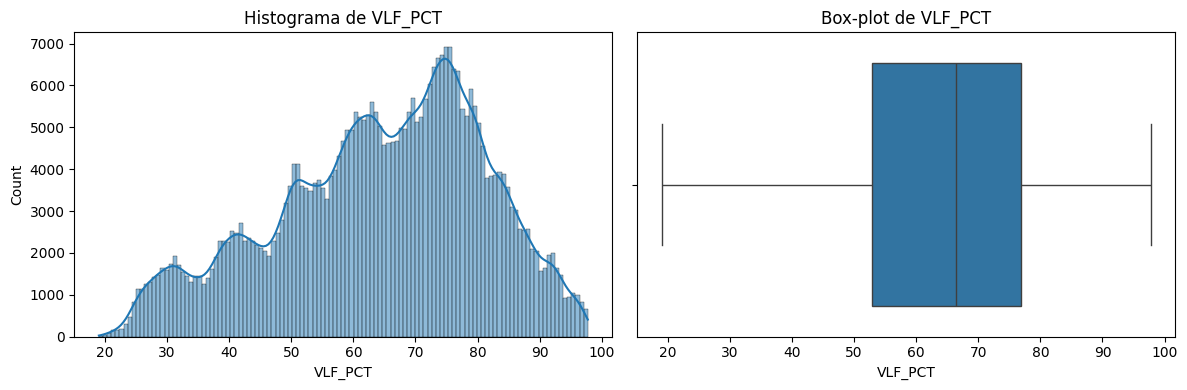

--- Análise da variável: LF ---


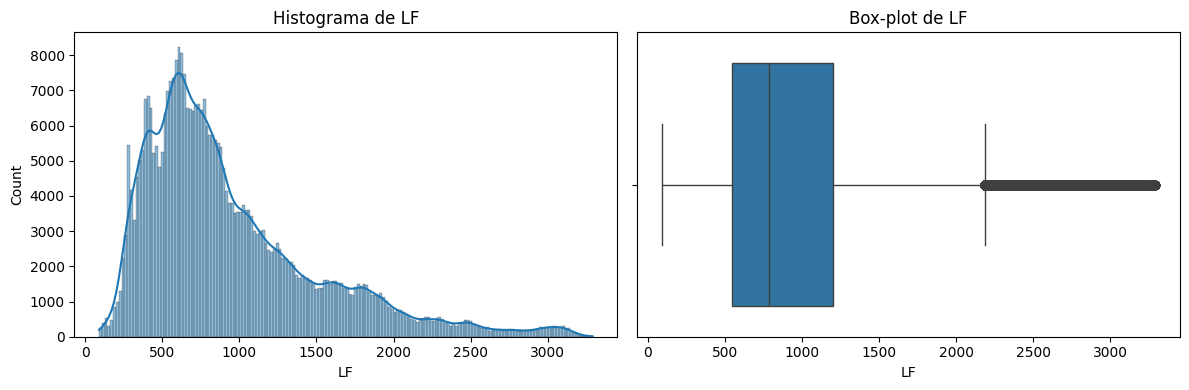

--- Análise da variável: LF_PCT ---


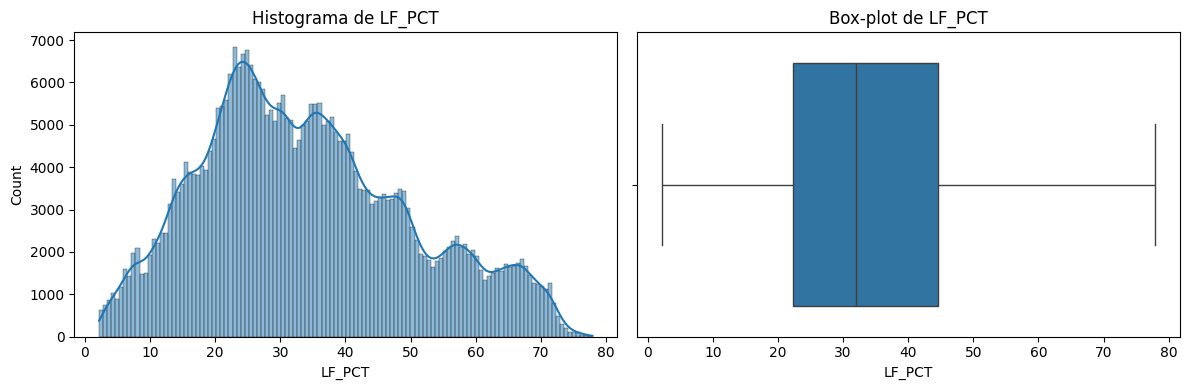

--- Análise da variável: LF_NU ---


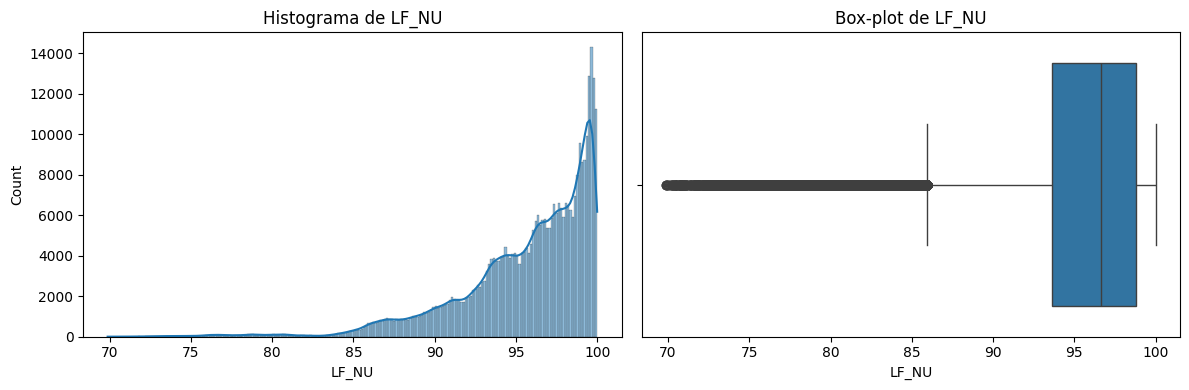

--- Análise da variável: HF ---


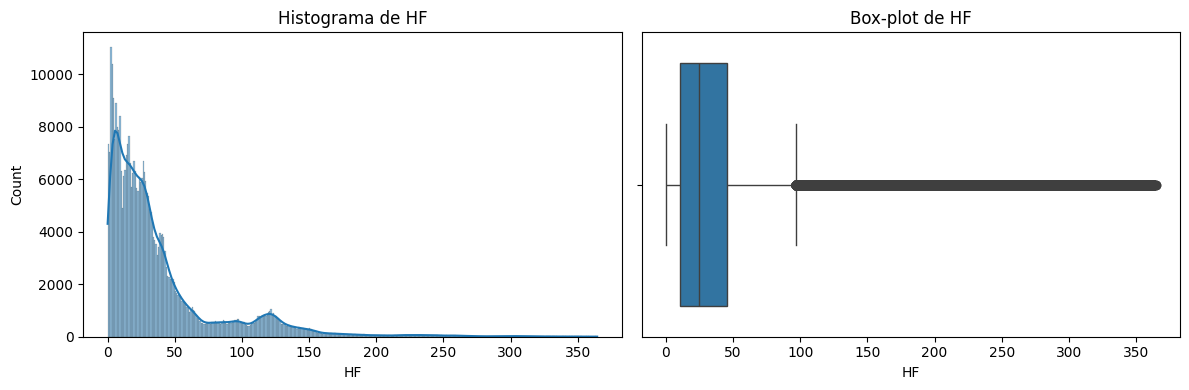

--- Análise da variável: HF_PCT ---


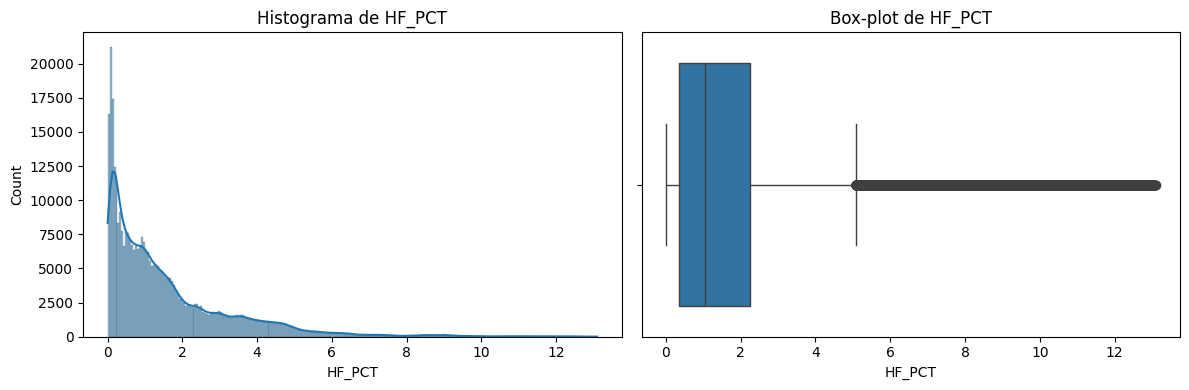

--- Análise da variável: HF_NU ---


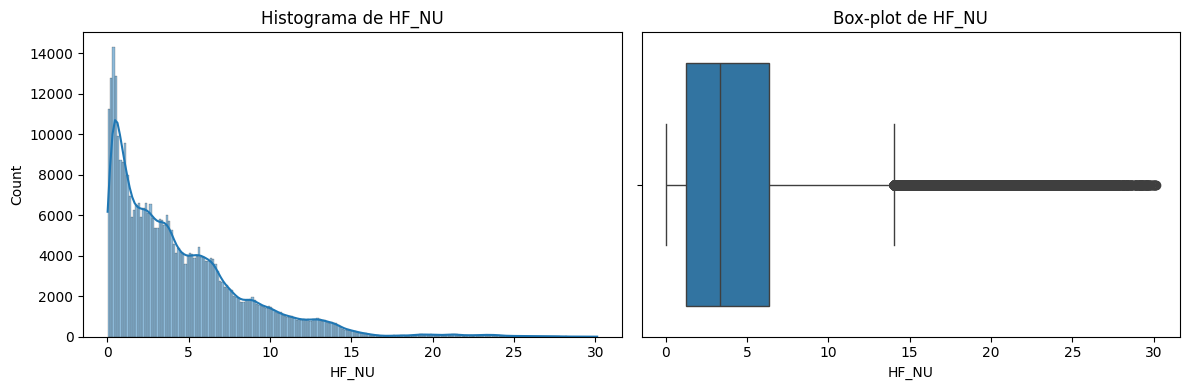

--- Análise da variável: TP ---


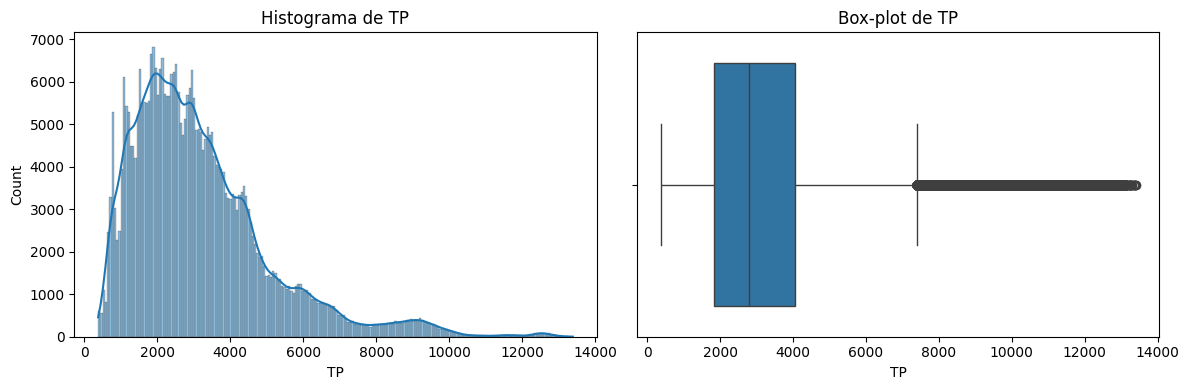

--- Análise da variável: LF_HF ---


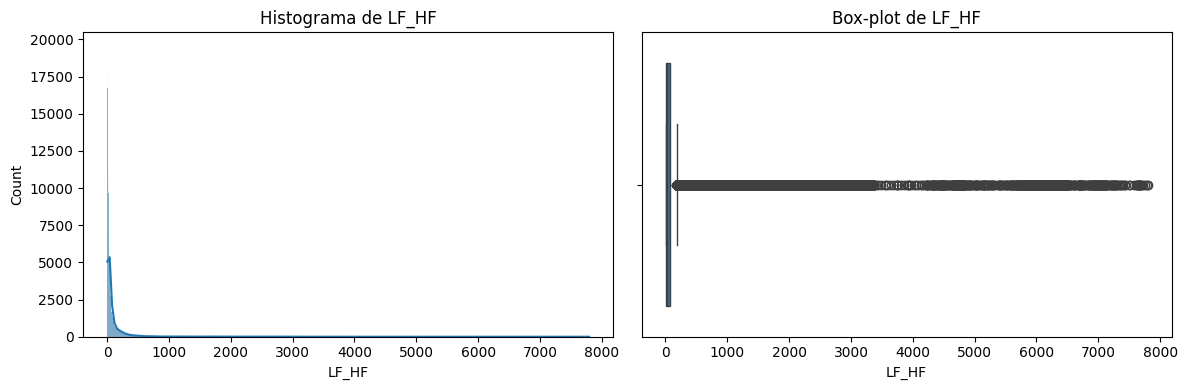

--- Análise da variável: HF_LF ---


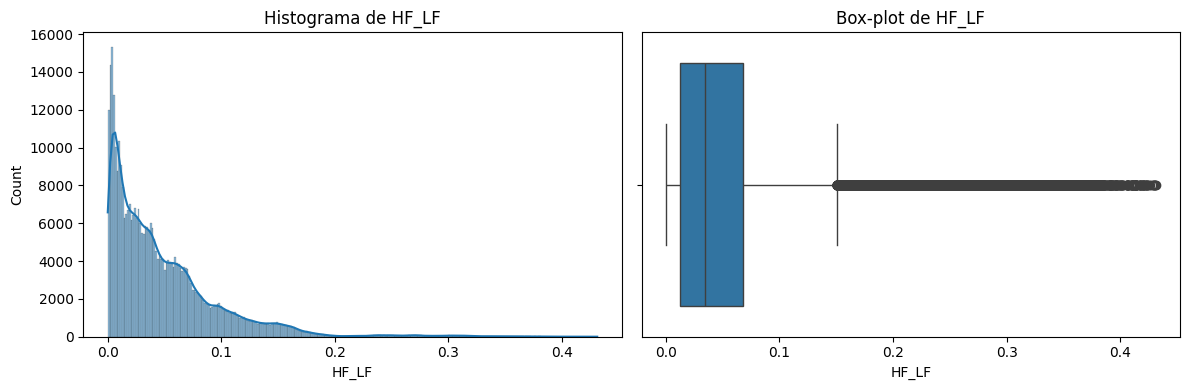

--- Análise da variável: SD1 ---


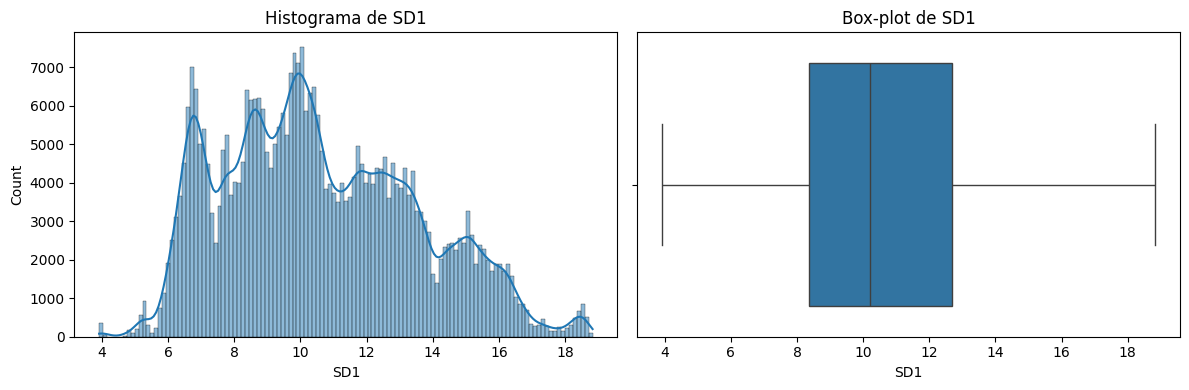

--- Análise da variável: SD2 ---


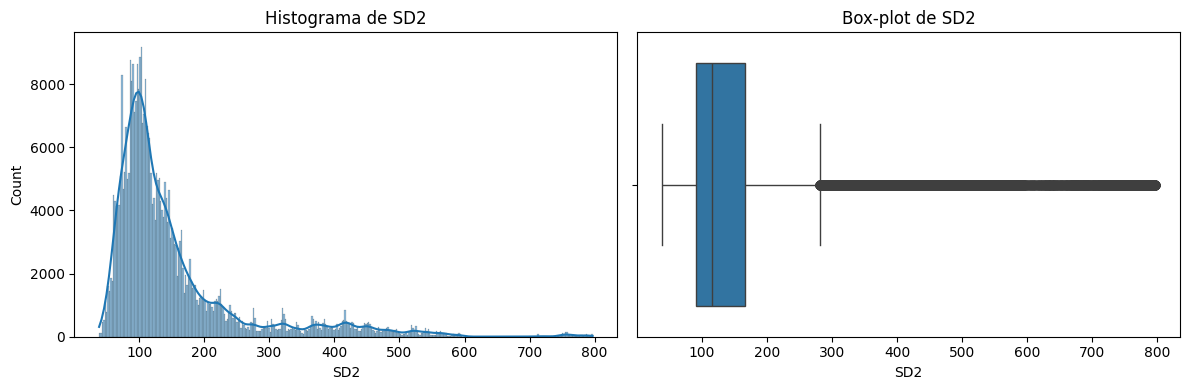

--- Análise da variável: sampen ---


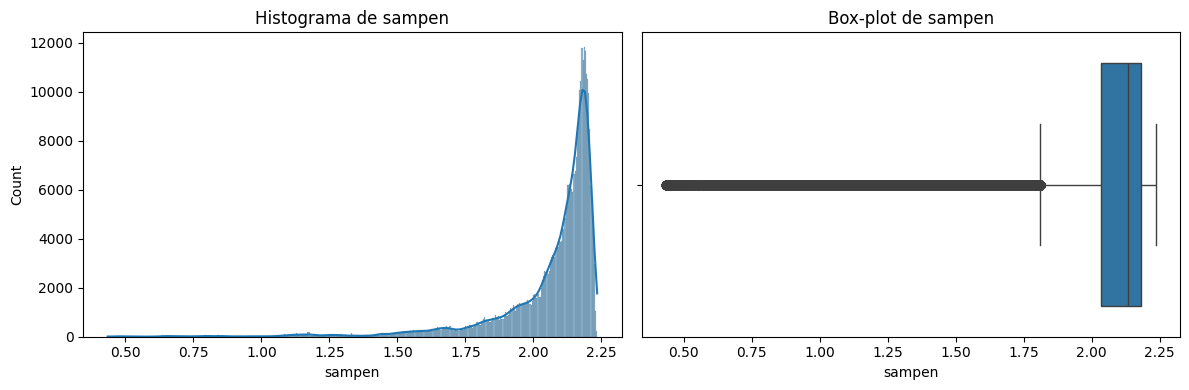

--- Análise da variável: higuci ---


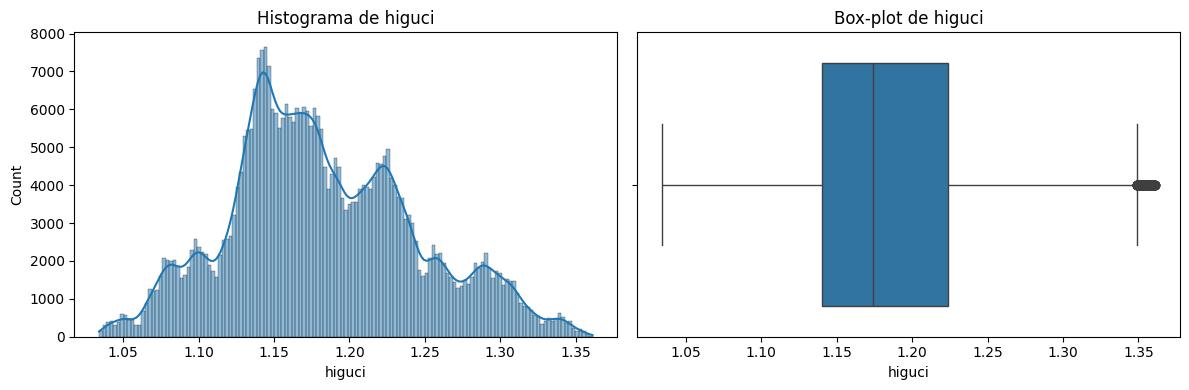

In [8]:
# Lista das colunas a serem visualizadas
colunas_a_visualizar = df_numerico.columns

# Loop para criar os gráficos para cada coluna
for coluna in colunas_a_visualizar:
    print(f"--- Análise da variável: {coluna} ---")

    # Criar uma figura com dois subgráficos (um para o histograma, um para o box-plot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma
    sns.histplot(df_completo[coluna], kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma de {coluna}')

    # Box-plot
    sns.boxplot(x=df_completo[coluna], ax=axes[1])
    axes[1].set_title(f'Box-plot de {coluna}')

    # Mostrar a figura
    plt.tight_layout()
    plt.show()

In [9]:
# Removendo as colunas não úteis
df_numerico_com_condicao = df_completo.drop(columns=['uuid', 'datasetId'])

# Agrupar pela coluna "condition" e calcular as estatísticas
estatisticas_condicionais = df_numerico_com_condicao.groupby('condition').describe()
assimetria_condicional = df_numerico_com_condicao.groupby('condition').skew()

# Exibir os resultados
print("--- Estatísticas Descritivas Condicionais ---")
print(estatisticas_condicionais.transpose())

print("\n-- Assimetria Condicional ---")
print(assimetria_condicional)

--- Estatísticas Descritivas Condicionais ---
condition       interruption      no stress  time pressure
MEAN_RR count  105150.000000  200082.000000   64057.000000
        mean      861.560952     812.929826     927.499113
        std       120.312234     109.994953     132.302495
        min       547.492221     574.412372     562.048068
        25%       769.517904     729.555357     842.778479
...                      ...            ...            ...
higuci  min         1.043268       1.046682       1.033984
        25%         1.141655       1.143823       1.105364
        50%         1.183433       1.173705       1.157472
        75%         1.230340       1.226210       1.202037
        max         1.361219       1.360764       1.323055

[272 rows x 3 columns]

--- Assimetria (Skewness) Condicional ---
                MEAN_RR  MEDIAN_RR      SDRR     RMSSD      SDSD  SDRR_RMSSD  \
condition                                                                      
interruption   0.68

--- Análise condicional da variável: MEAN_RR ---


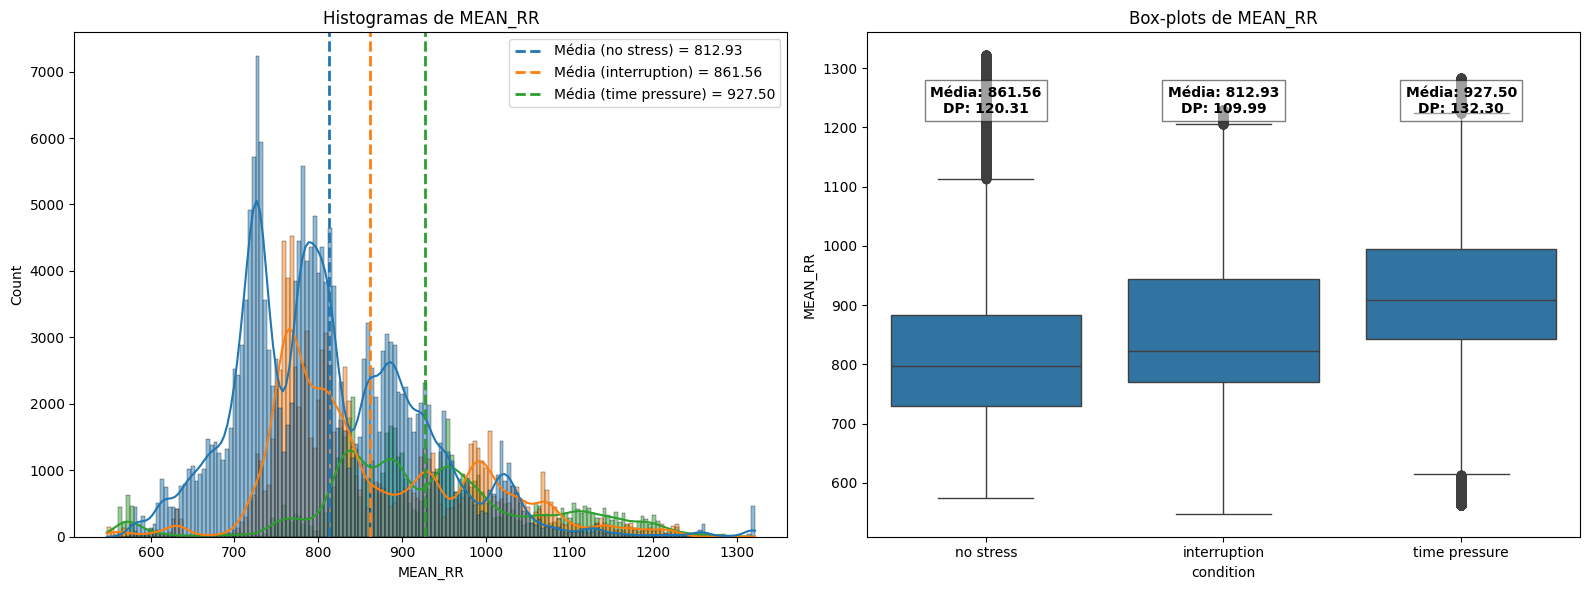

--- Análise condicional da variável: MEDIAN_RR ---


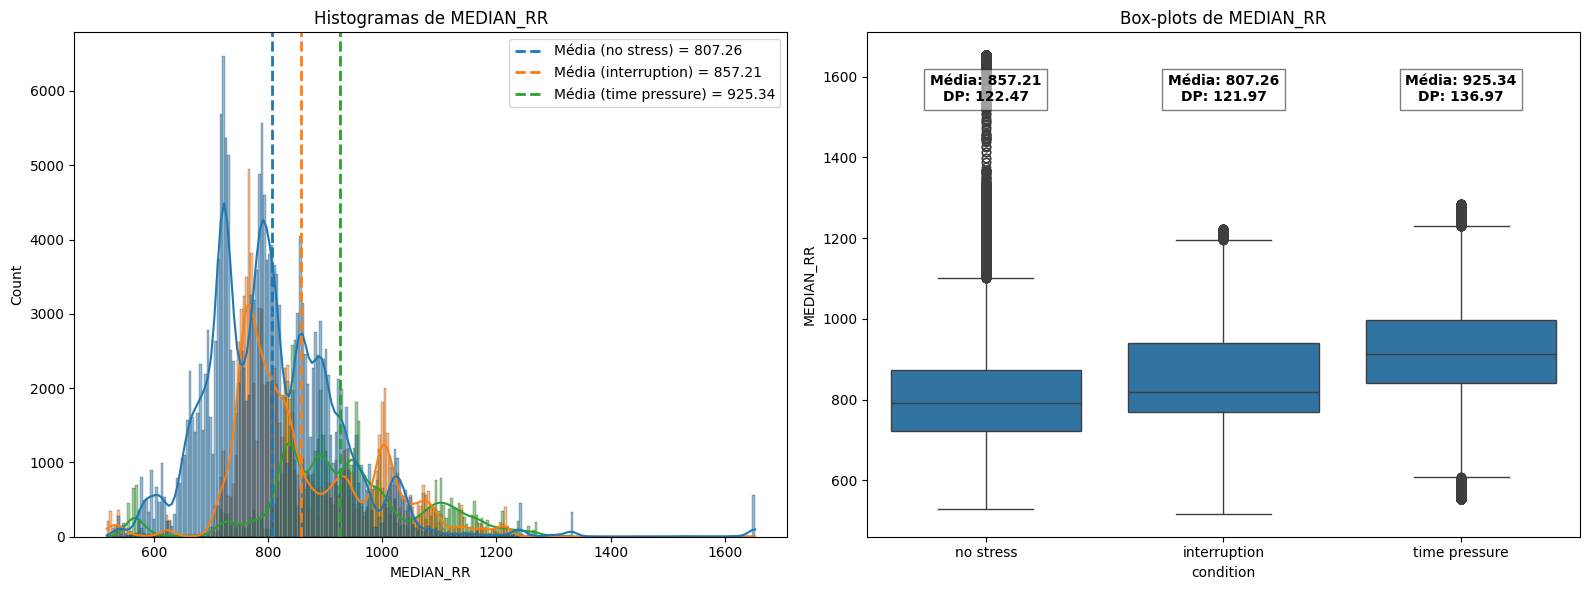

--- Análise condicional da variável: SDRR ---


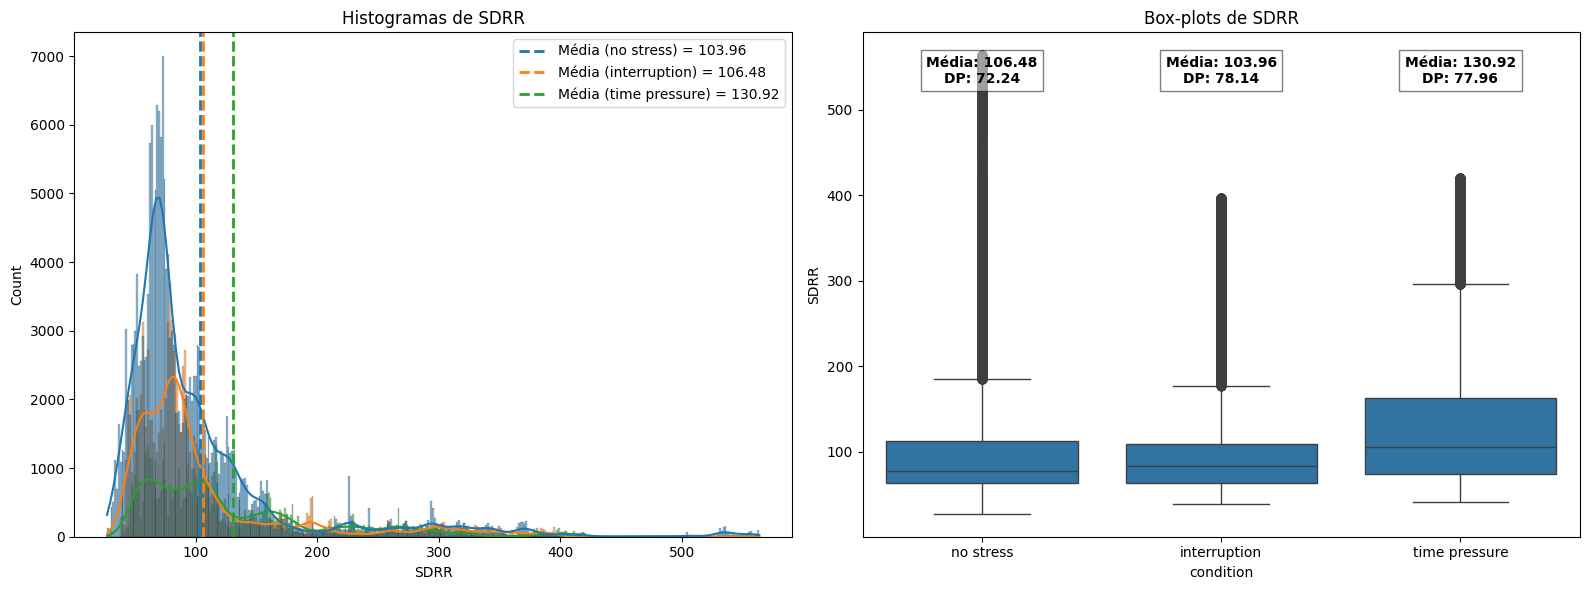

--- Análise condicional da variável: RMSSD ---


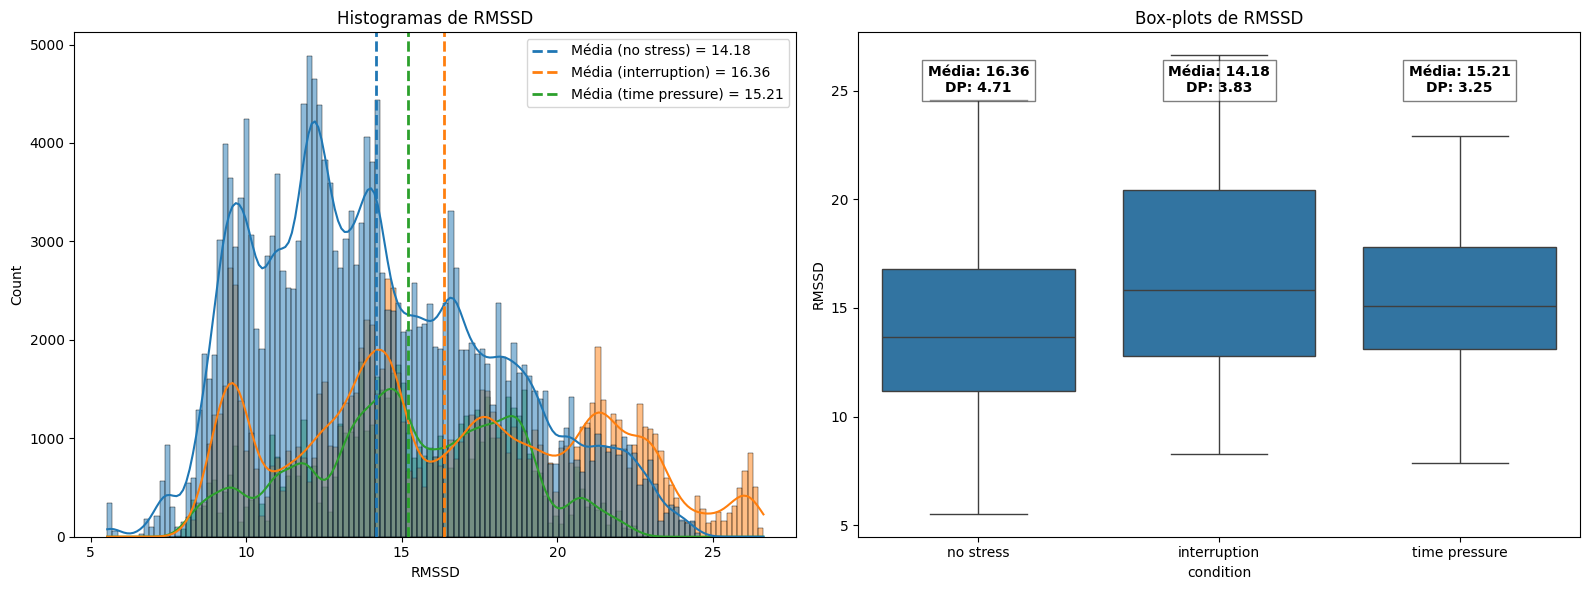

--- Análise condicional da variável: SDSD ---


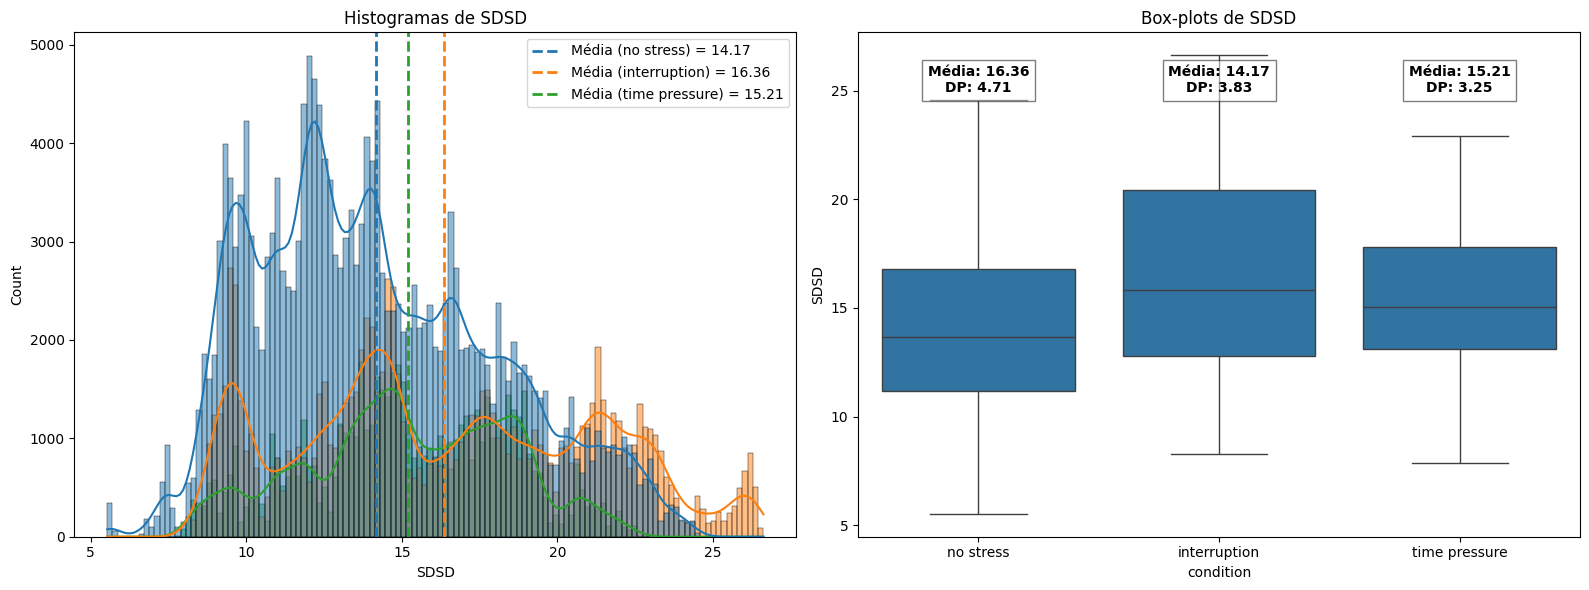

--- Análise condicional da variável: SDRR_RMSSD ---


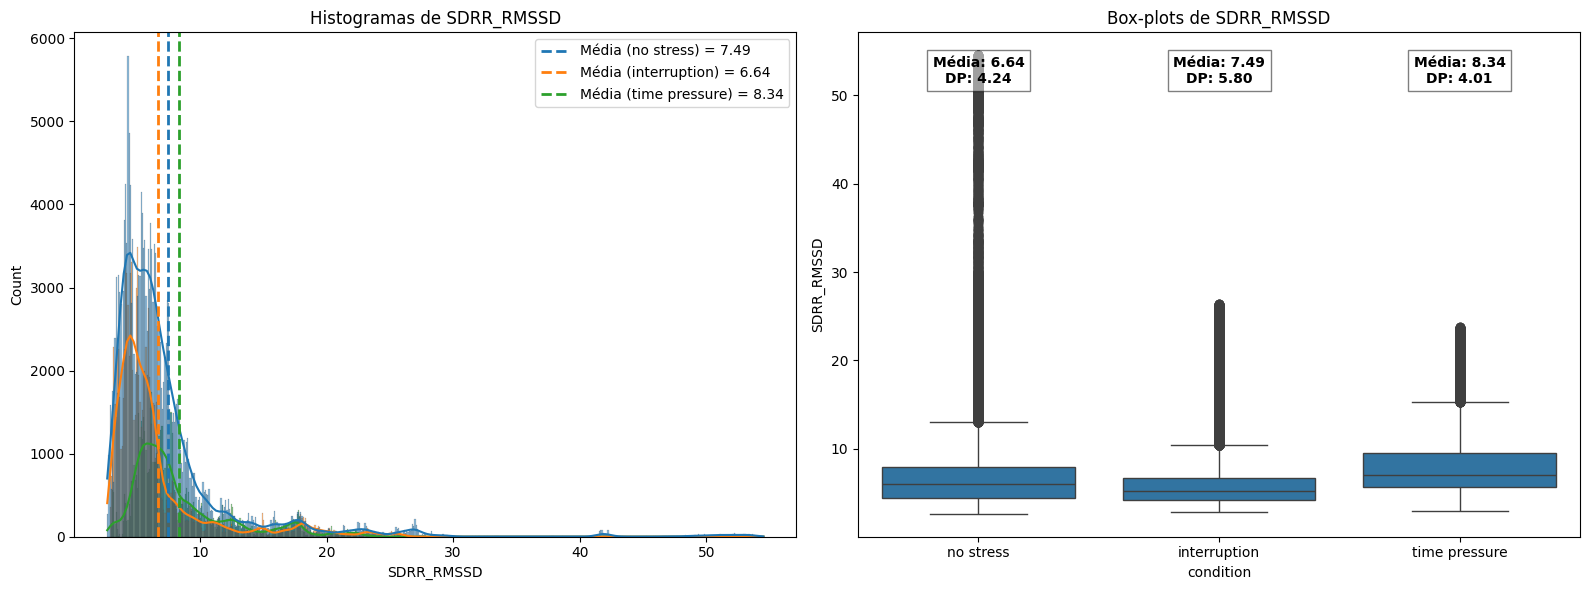

--- Análise condicional da variável: HR ---


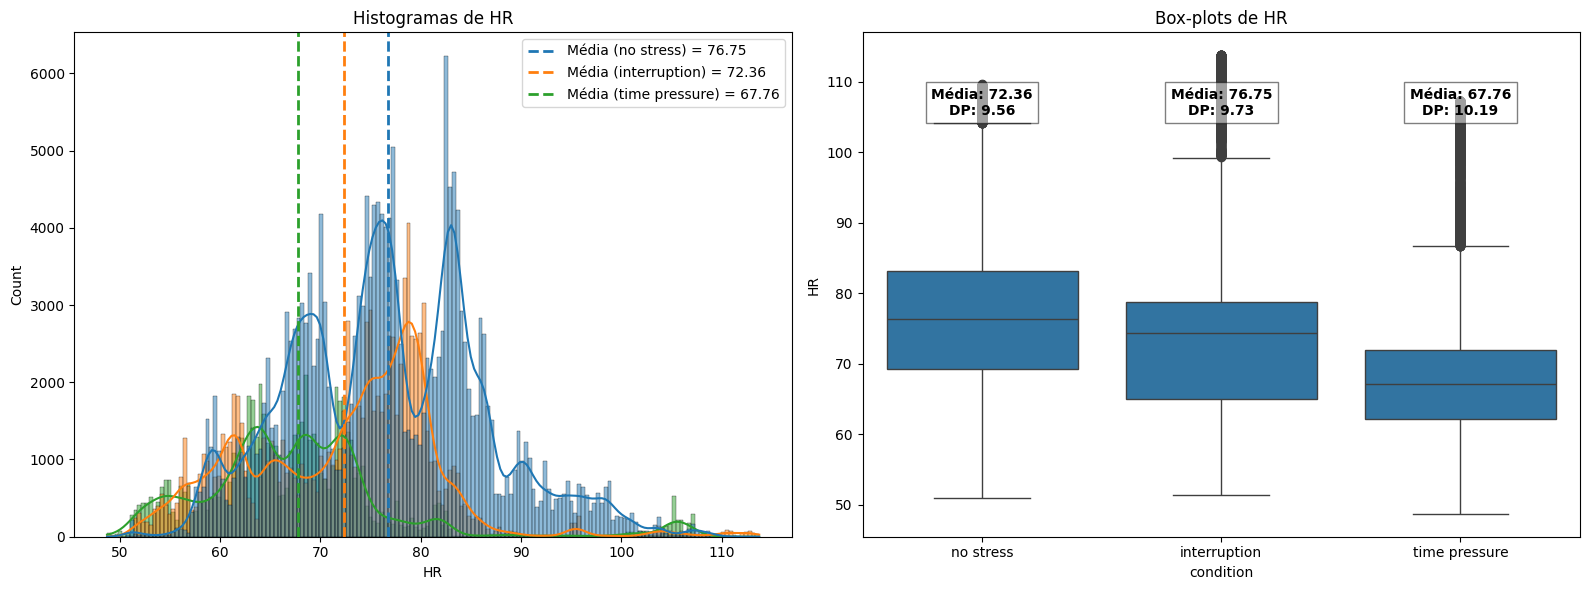

--- Análise condicional da variável: pNN25 ---


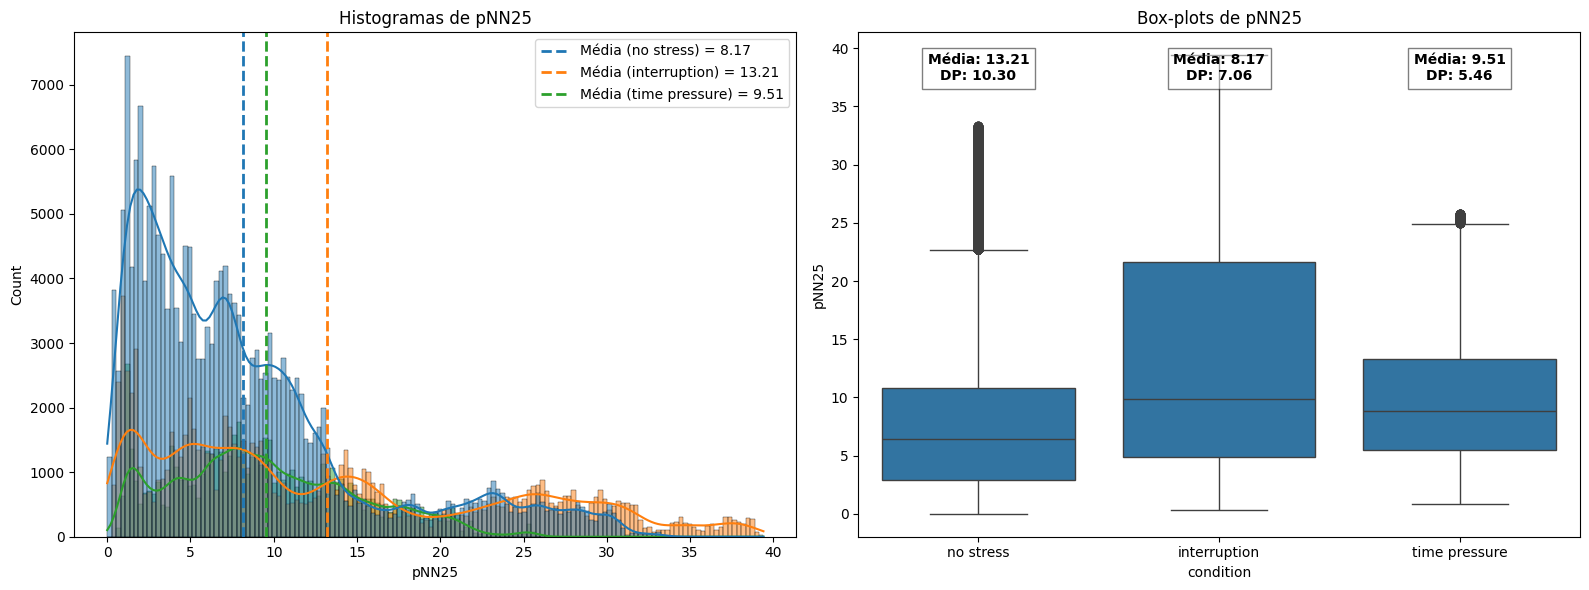

--- Análise condicional da variável: pNN50 ---


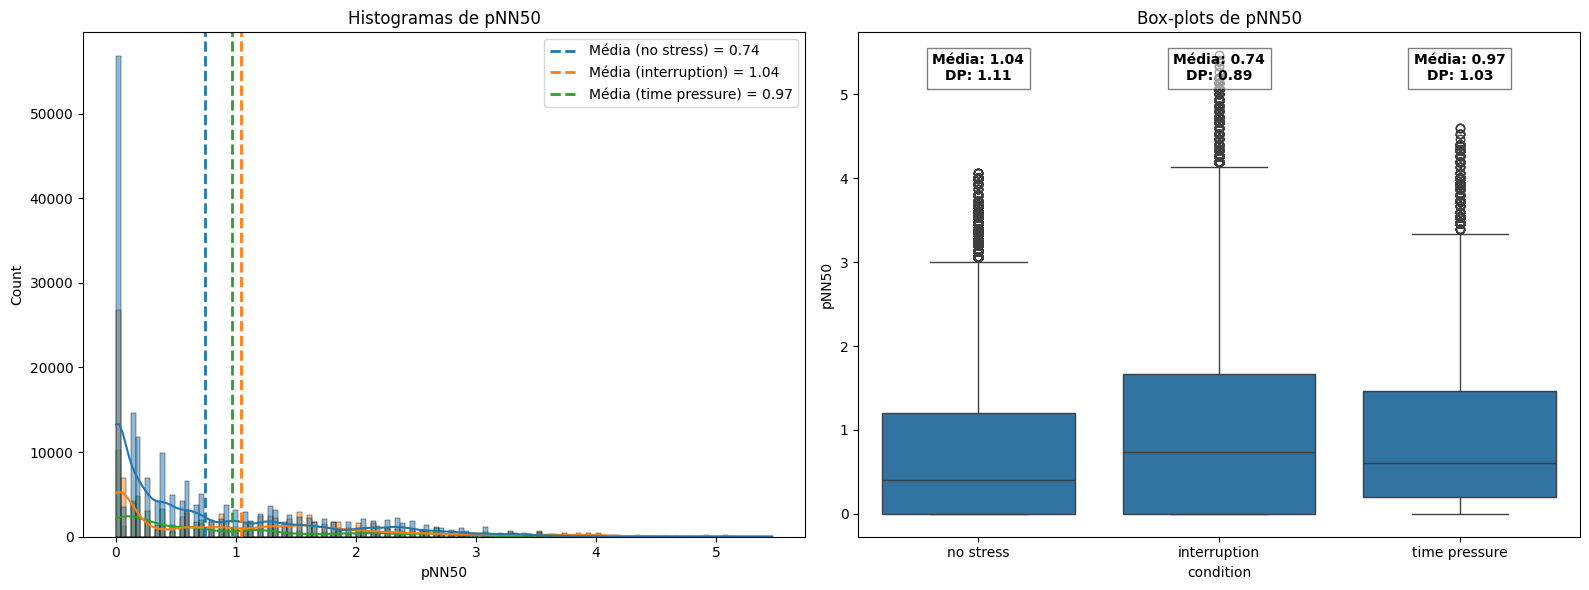

--- Análise condicional da variável: KURT ---


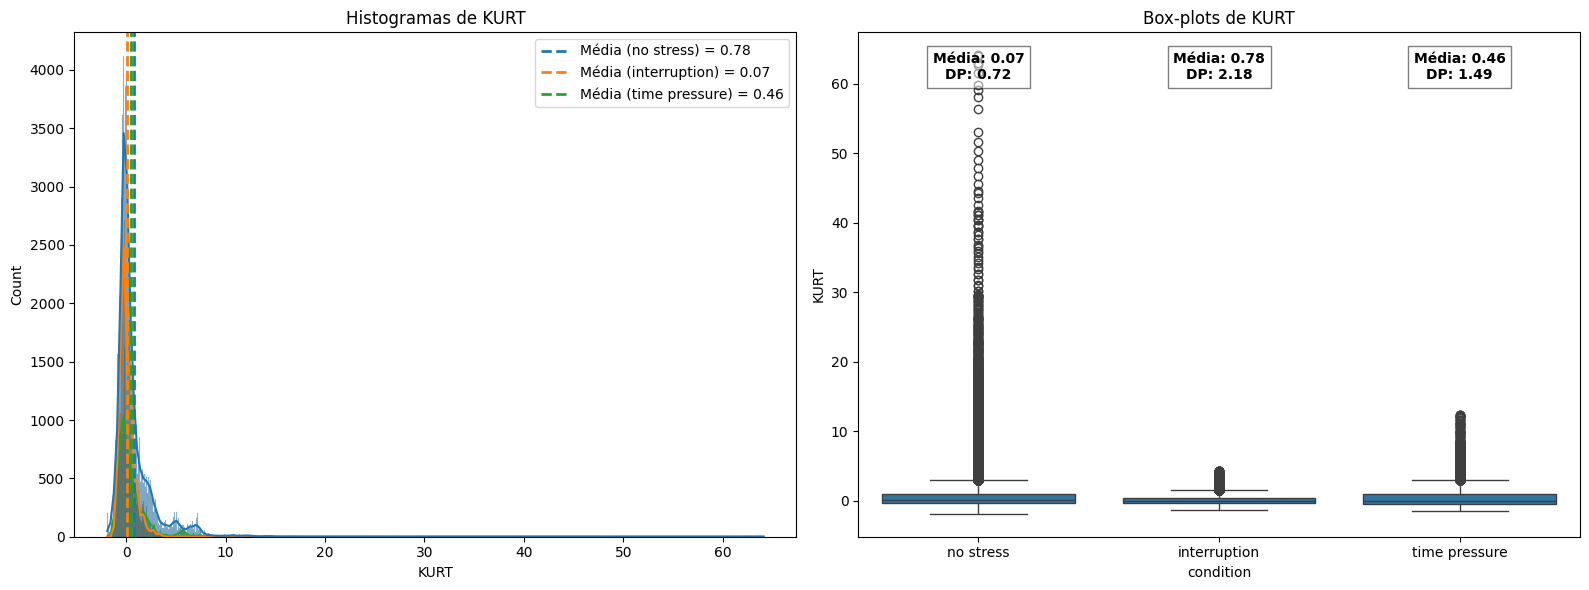

--- Análise condicional da variável: SKEW ---


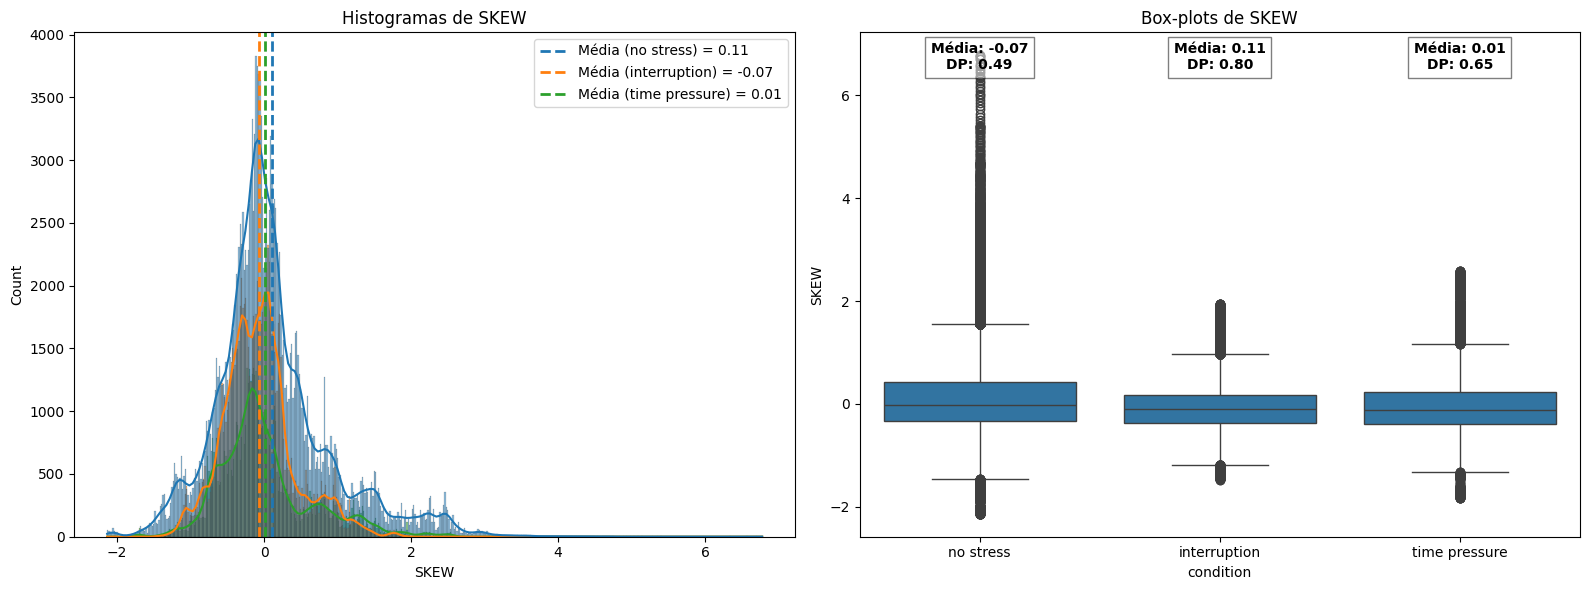

--- Análise condicional da variável: MEAN_REL_RR ---


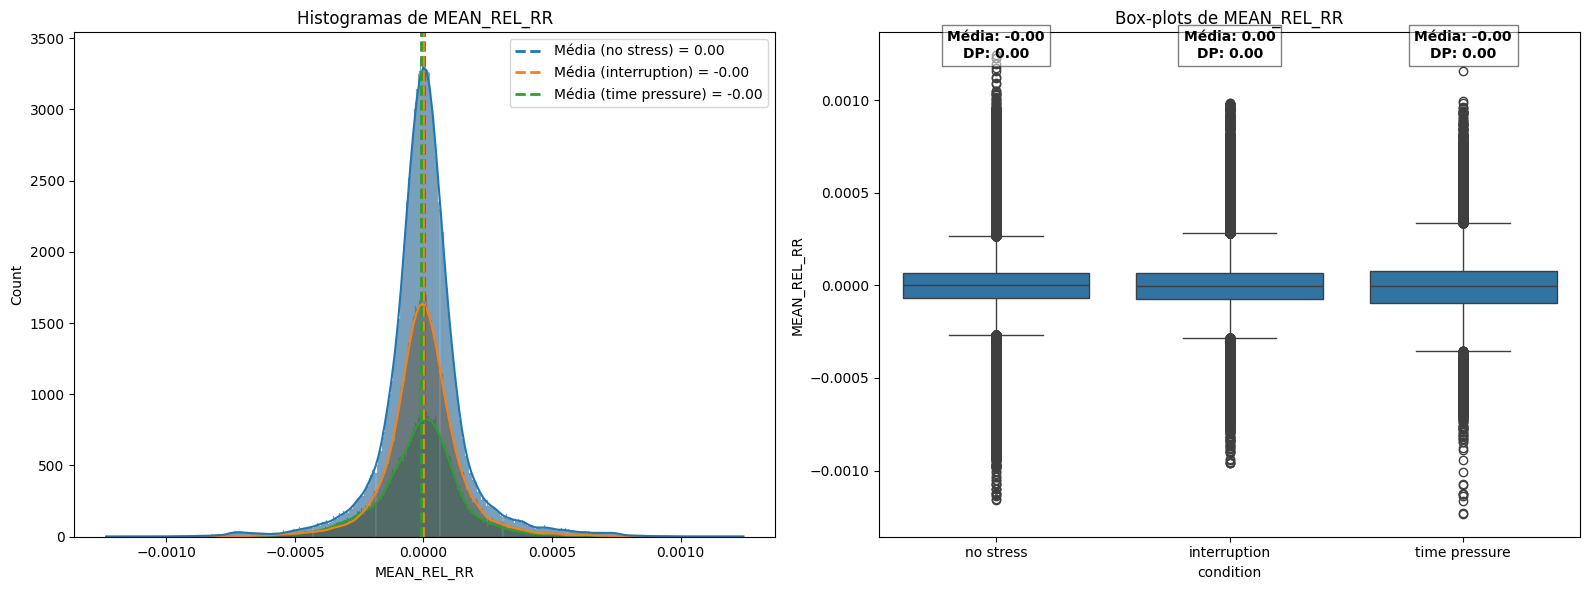

--- Análise condicional da variável: MEDIAN_REL_RR ---


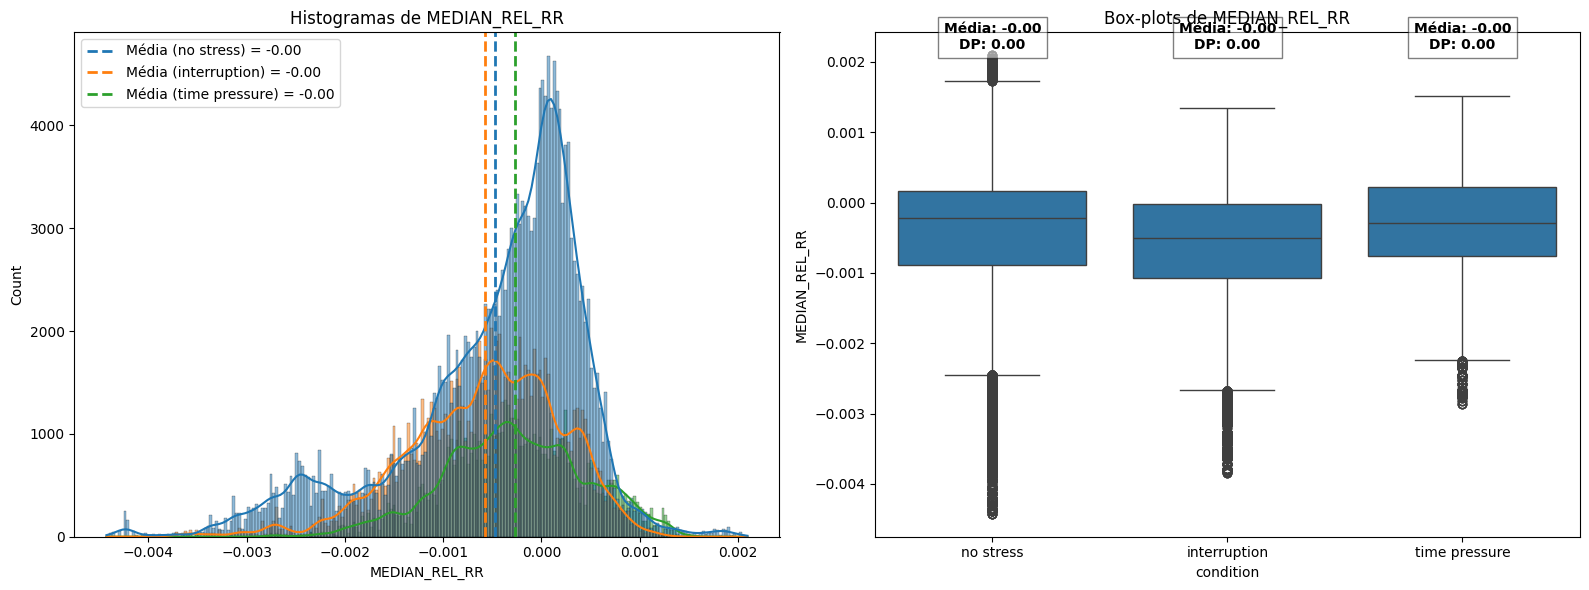

--- Análise condicional da variável: SDRR_REL_RR ---


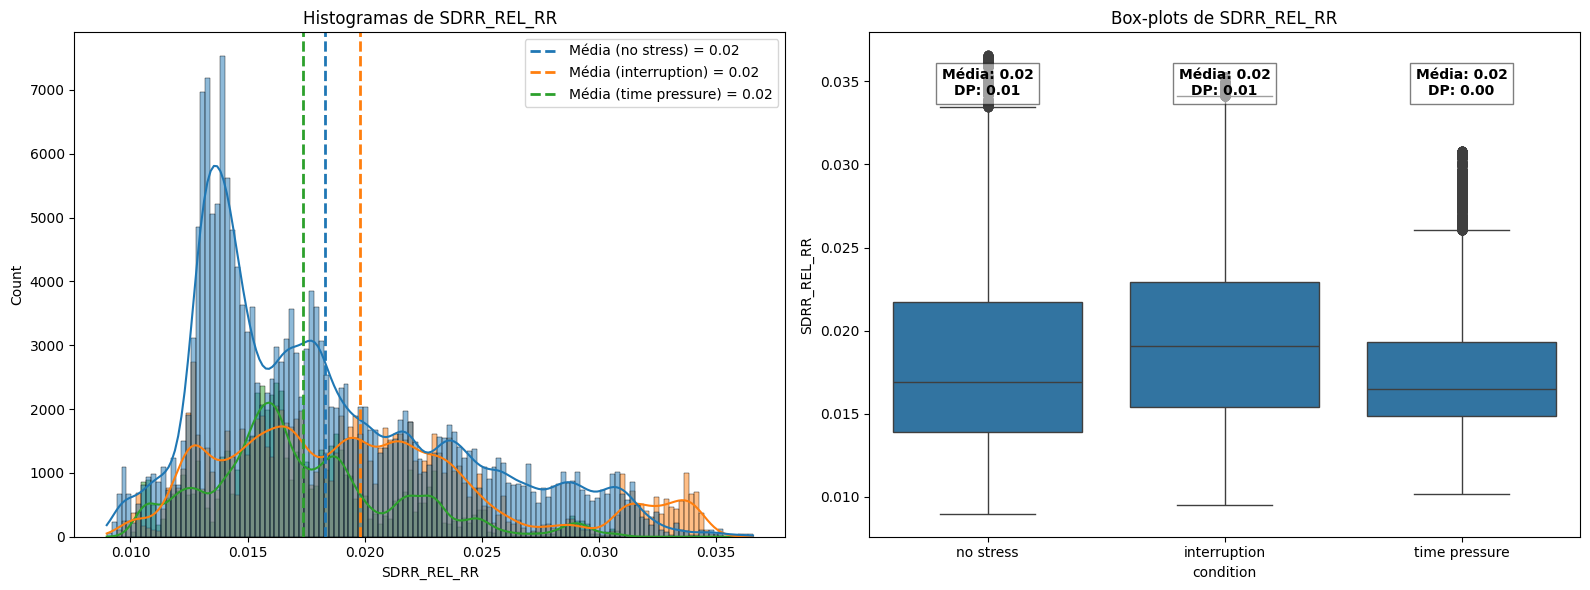

--- Análise condicional da variável: RMSSD_REL_RR ---


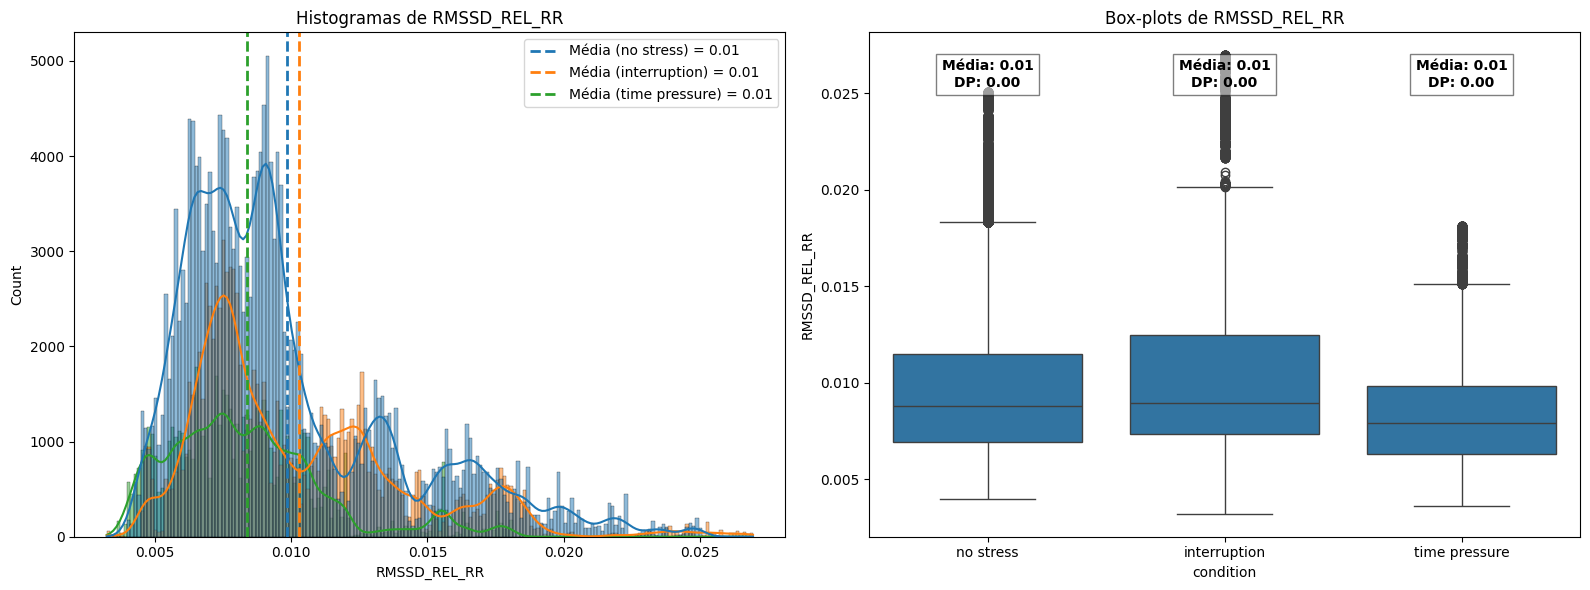

--- Análise condicional da variável: SDSD_REL_RR ---


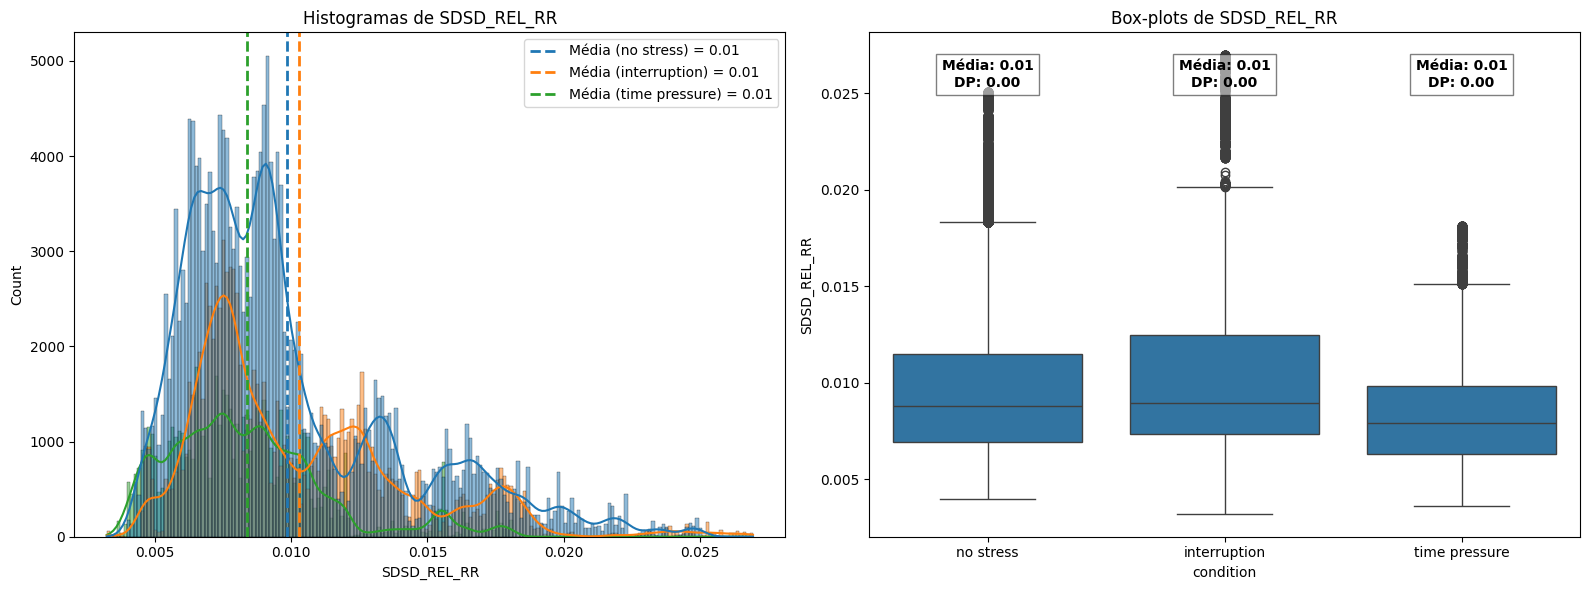

--- Análise condicional da variável: SDRR_RMSSD_REL_RR ---


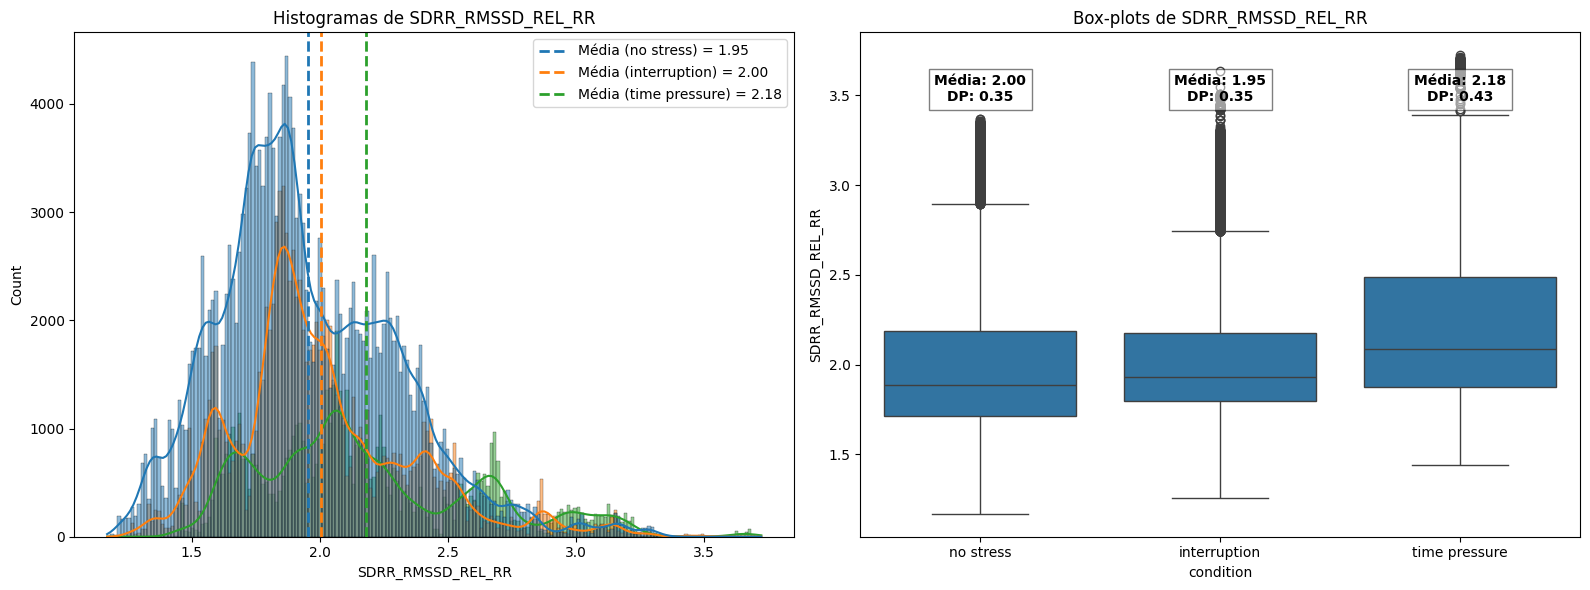

--- Análise condicional da variável: KURT_REL_RR ---


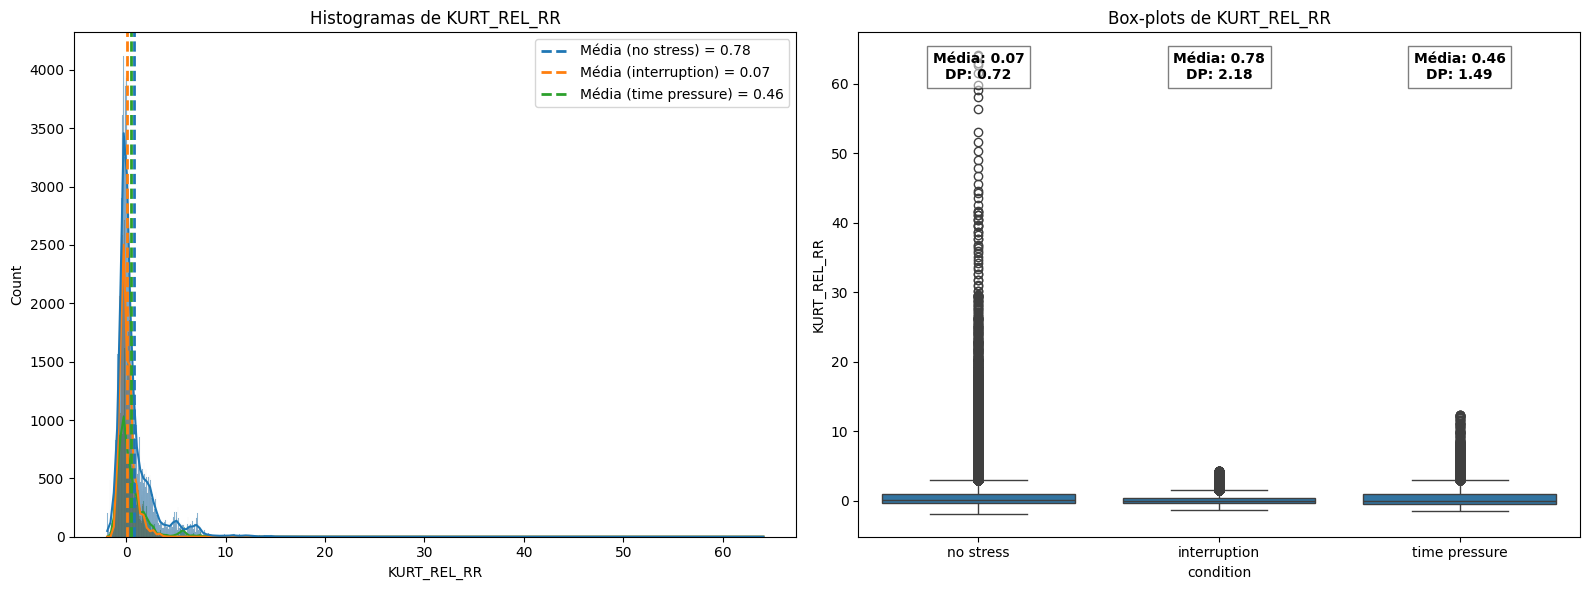

--- Análise condicional da variável: SKEW_REL_RR ---


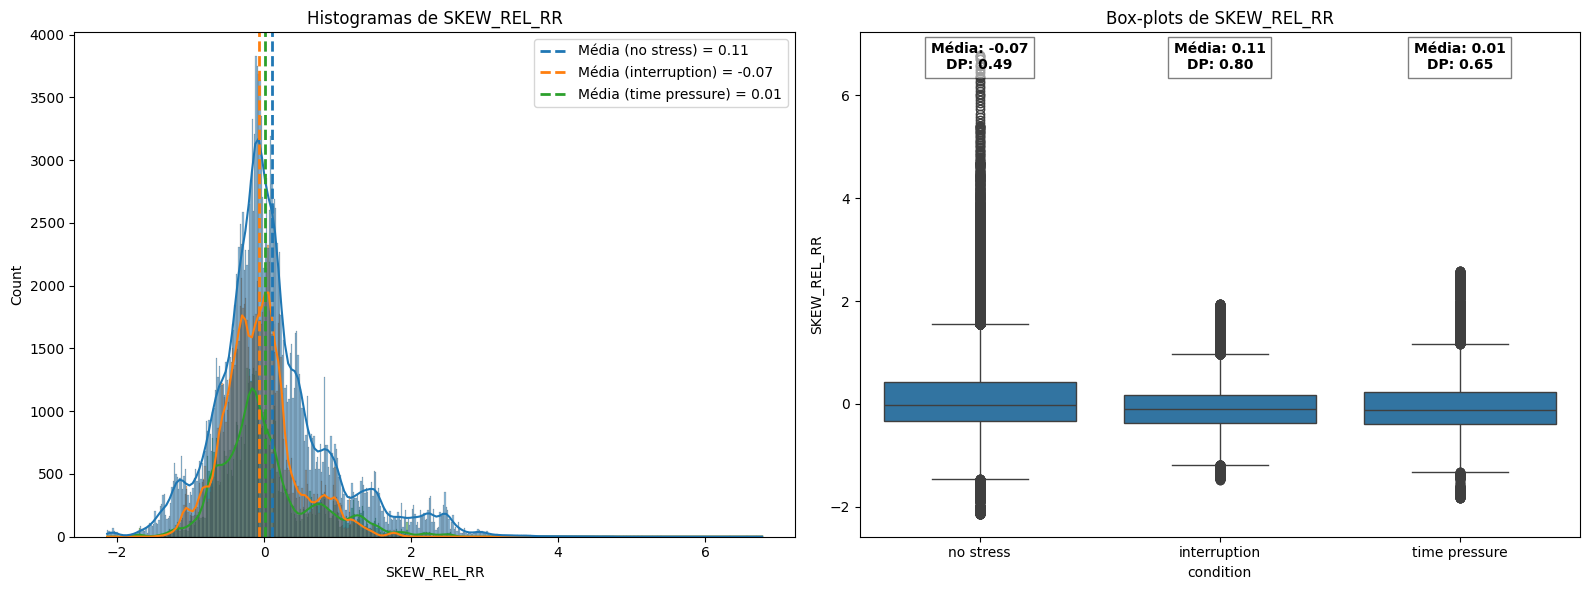

--- Análise condicional da variável: VLF ---


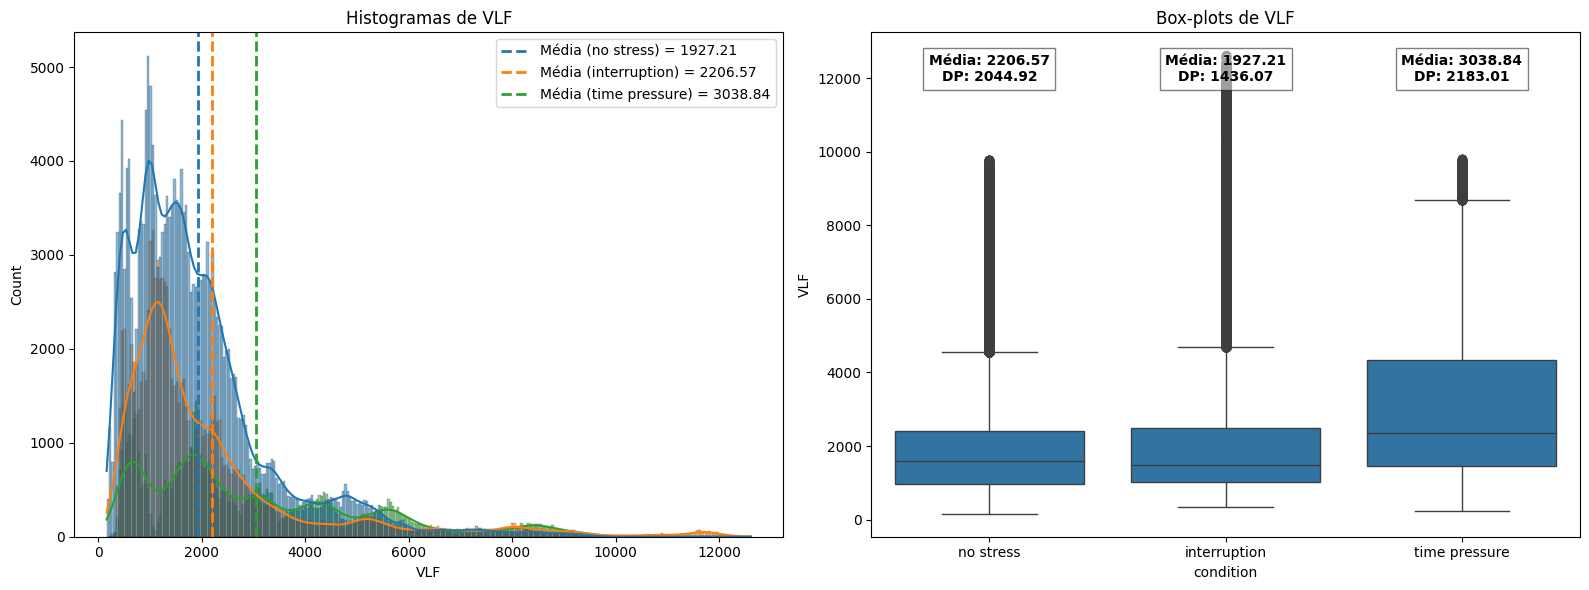

--- Análise condicional da variável: VLF_PCT ---


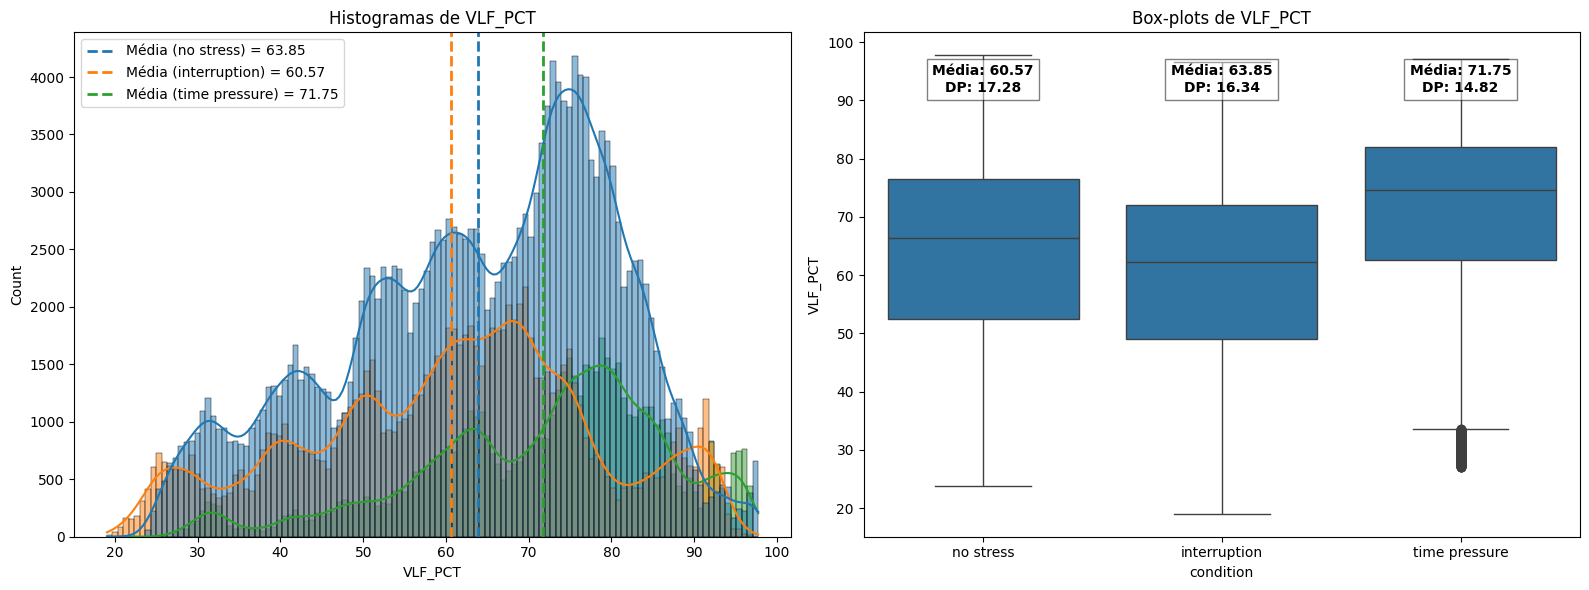

--- Análise condicional da variável: LF ---


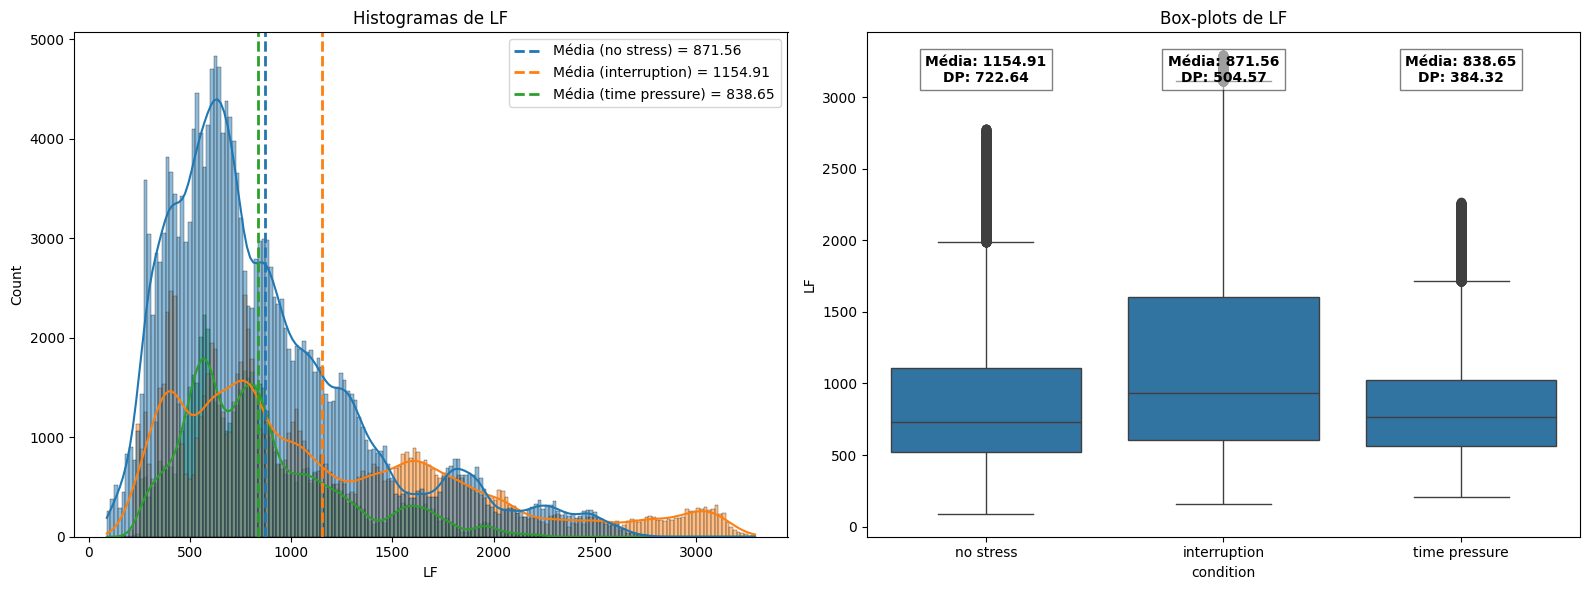

--- Análise condicional da variável: LF_PCT ---


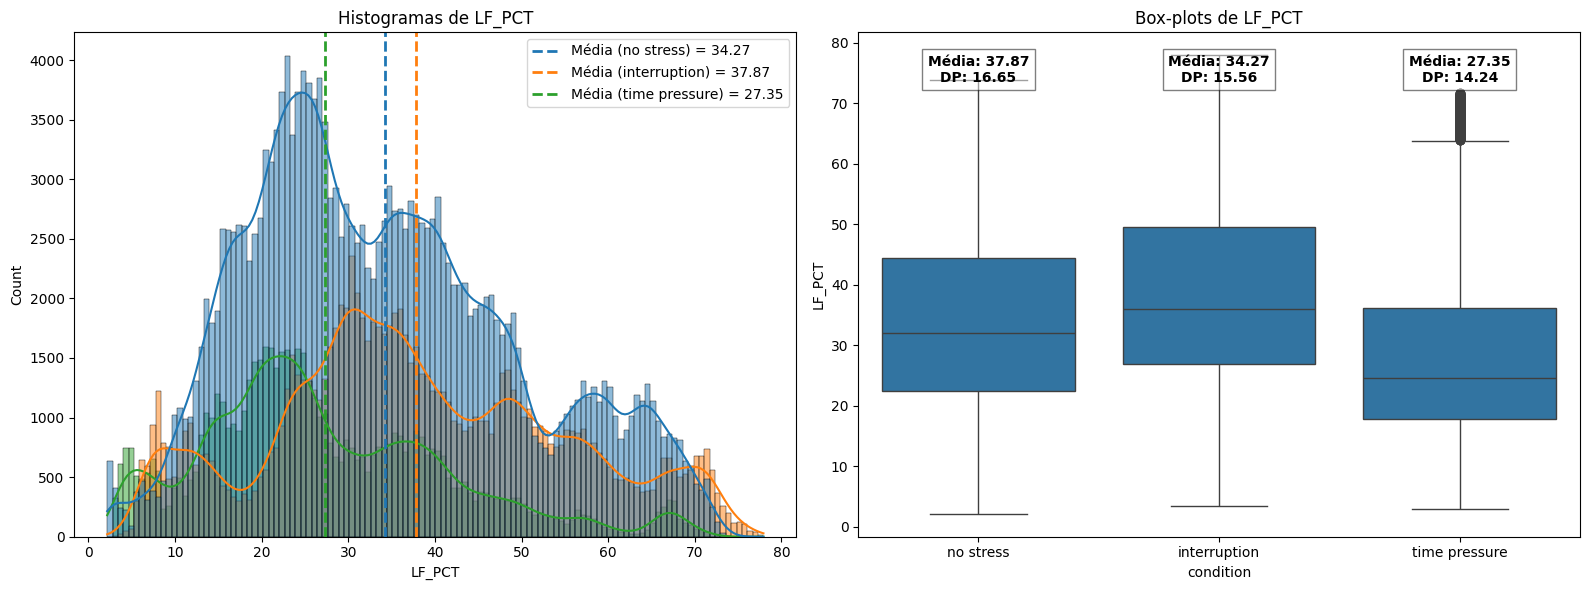

--- Análise condicional da variável: LF_NU ---


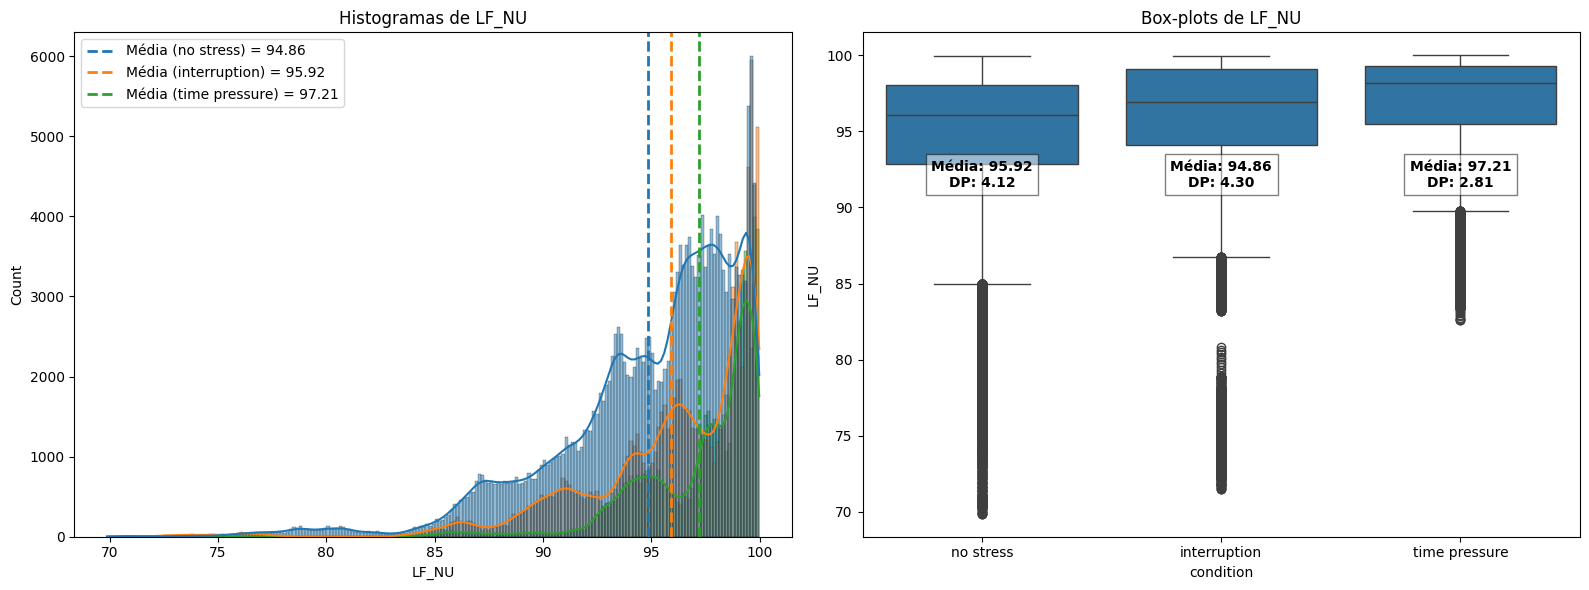

--- Análise condicional da variável: HF ---


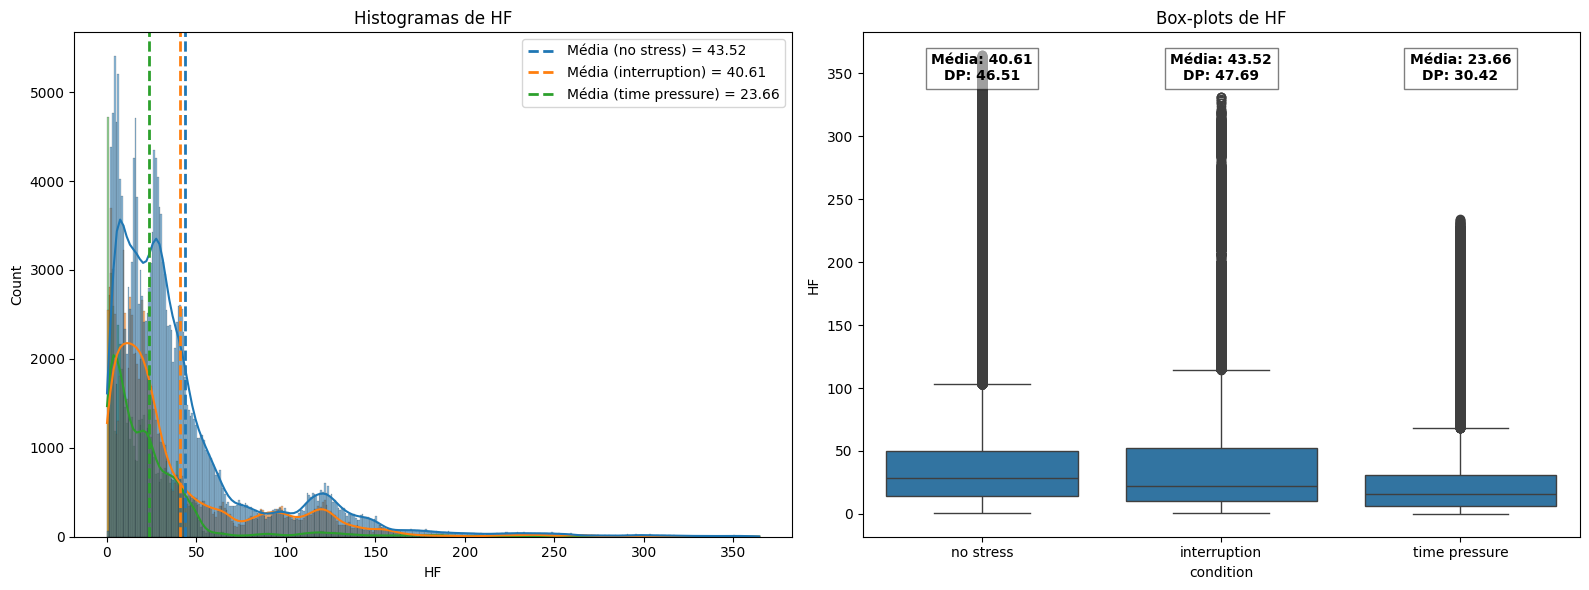

--- Análise condicional da variável: HF_PCT ---


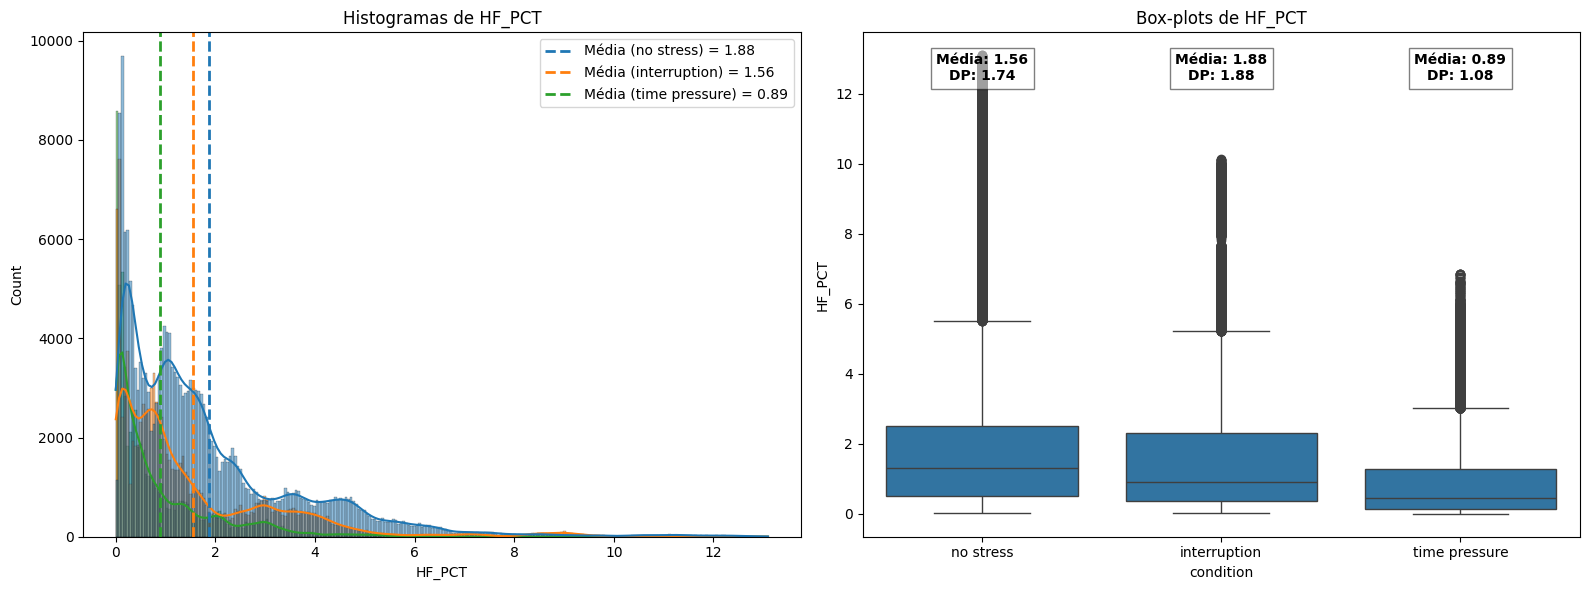

--- Análise condicional da variável: HF_NU ---


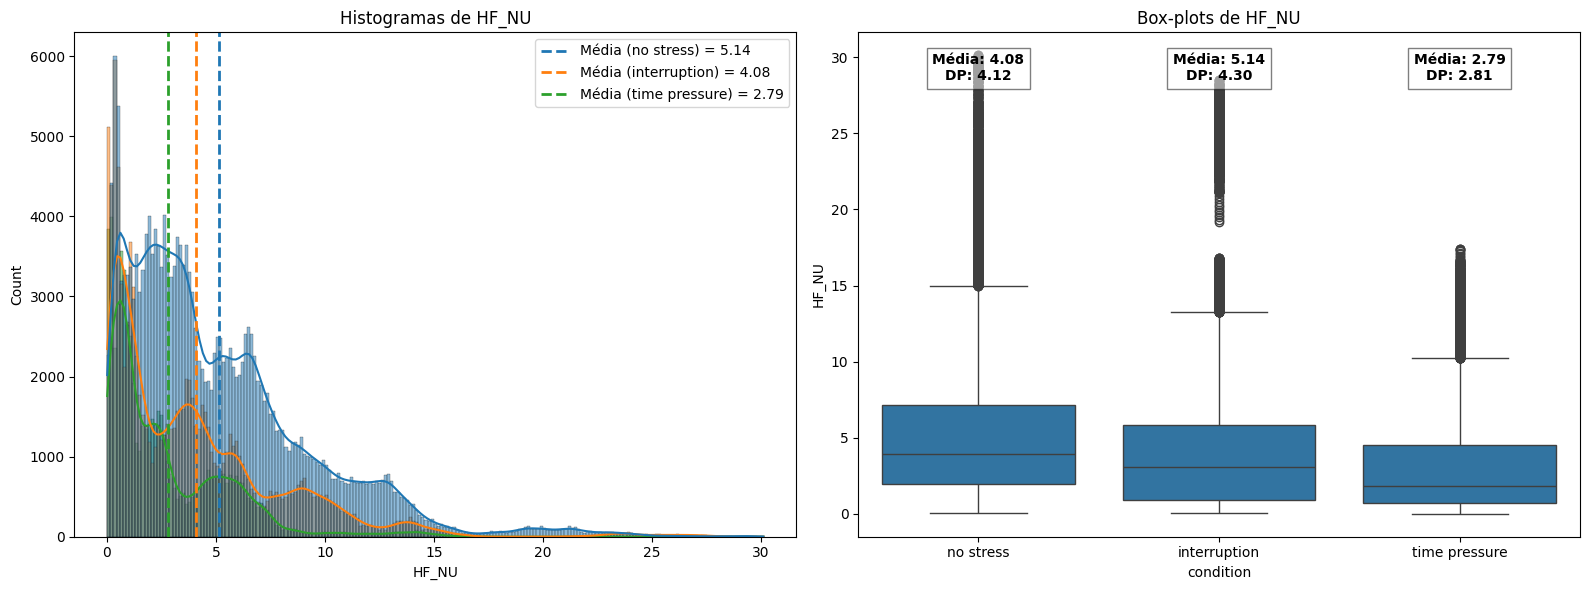

--- Análise condicional da variável: TP ---


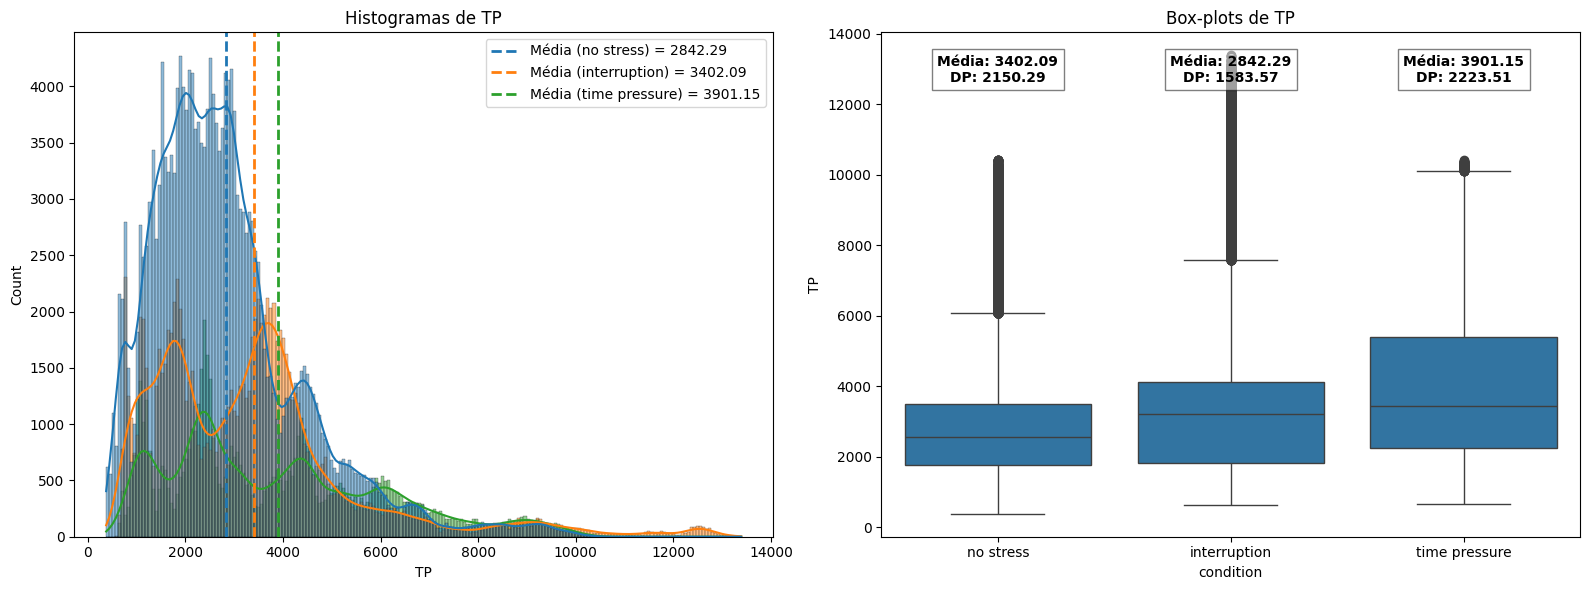

--- Análise condicional da variável: LF_HF ---


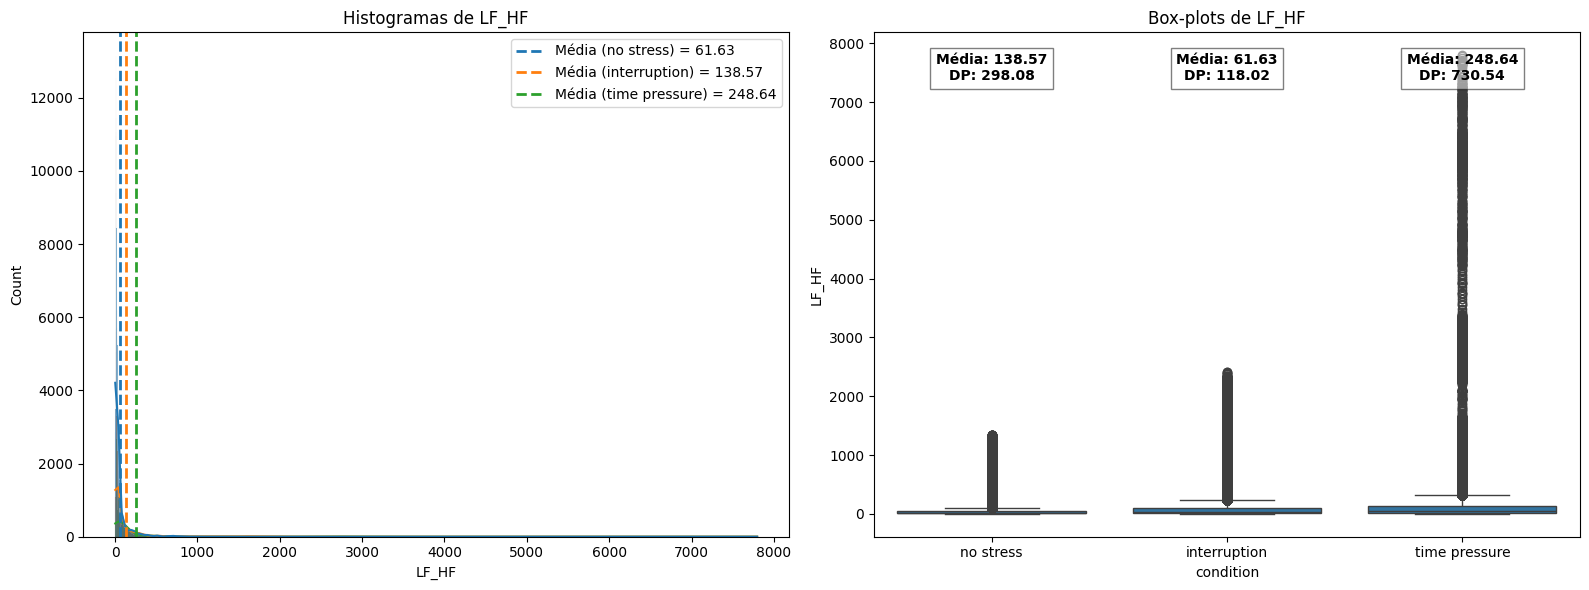

--- Análise condicional da variável: HF_LF ---


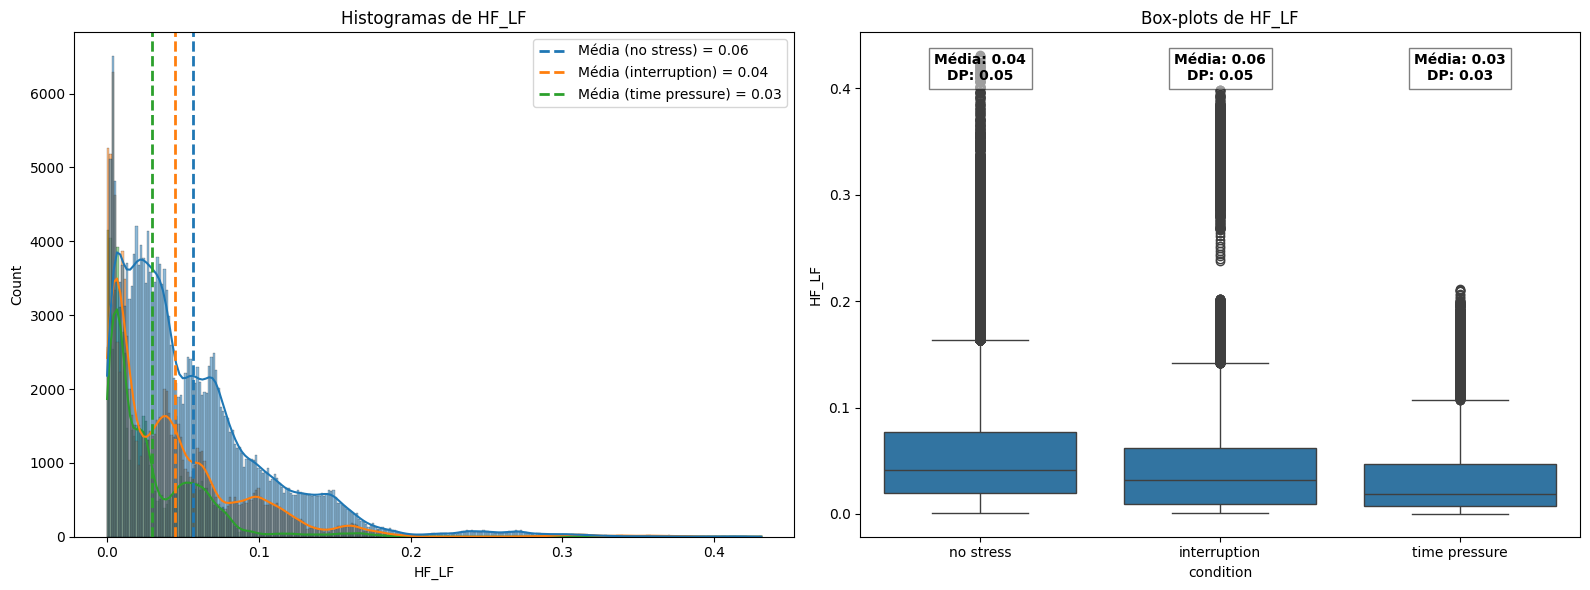

--- Análise condicional da variável: SD1 ---


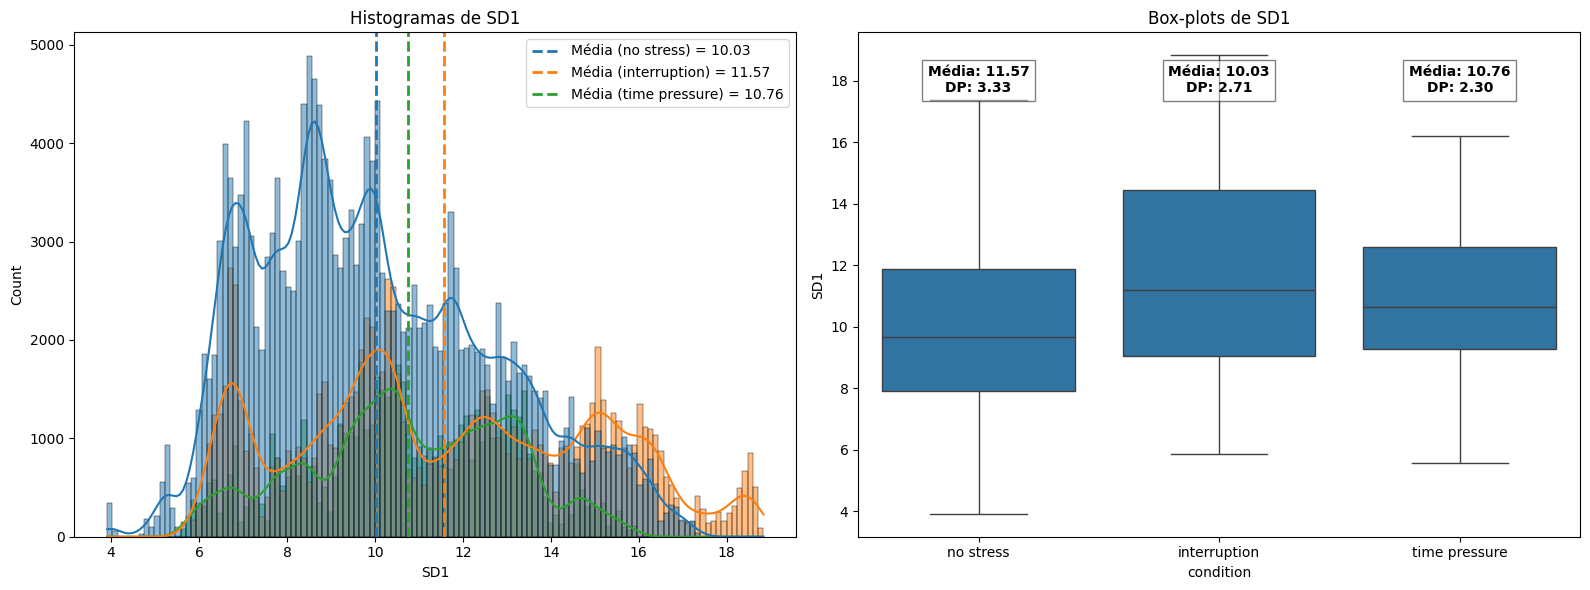

--- Análise condicional da variável: SD2 ---


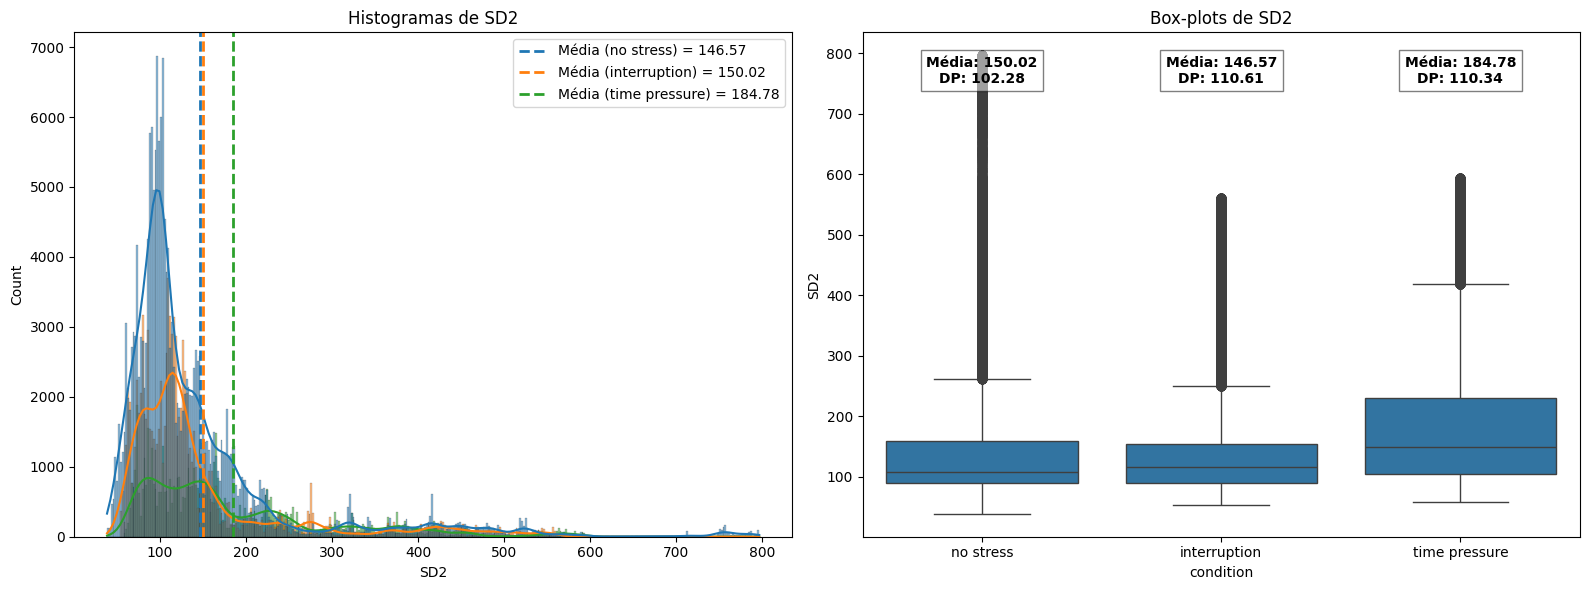

--- Análise condicional da variável: sampen ---


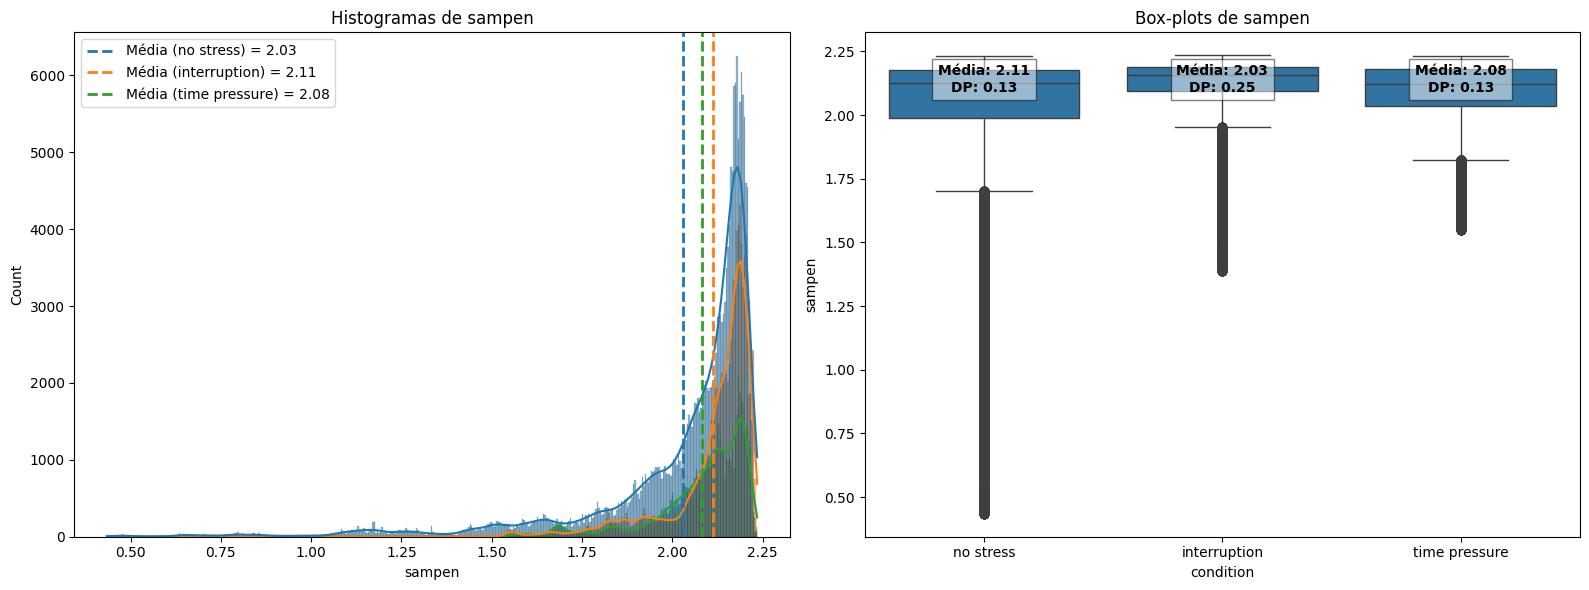

--- Análise condicional da variável: higuci ---


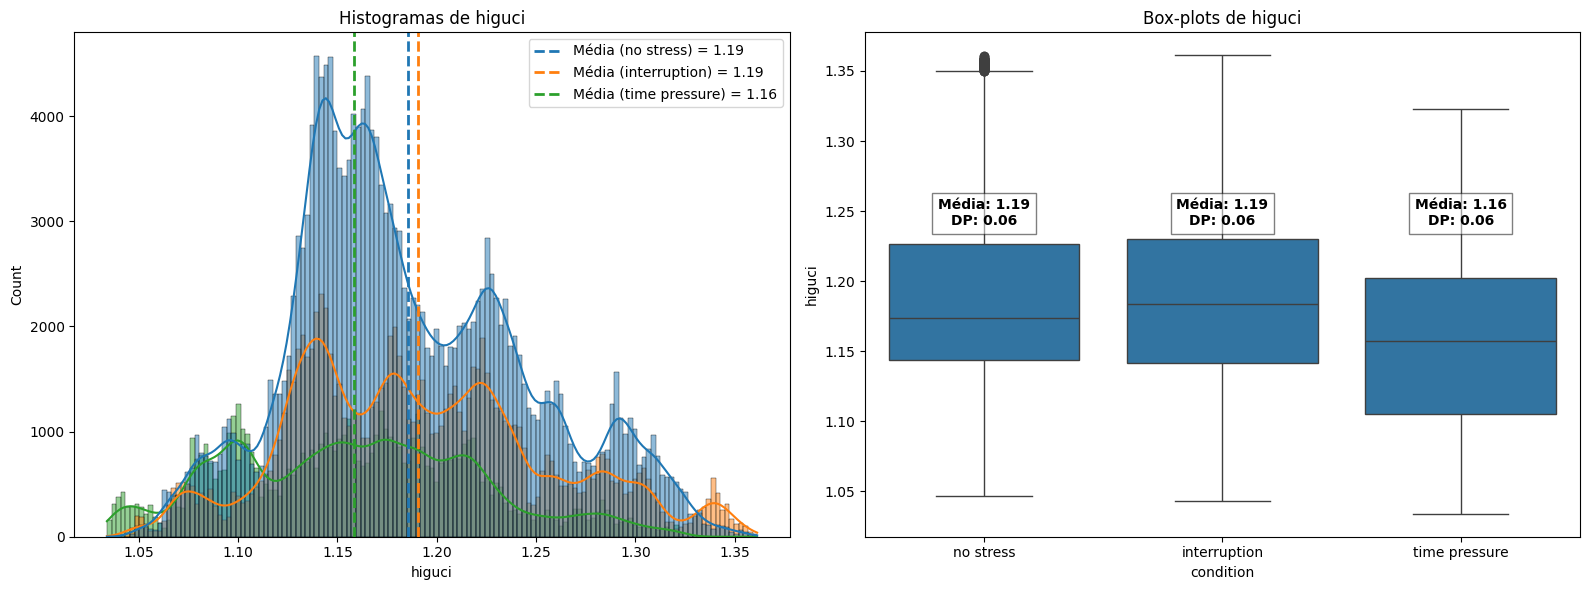

In [10]:
# Lista das colunas a serem visualizadas (sem as colunas não numéricas e a própria condição)
colunas_a_visualizar = df_completo.drop(columns=['uuid', 'datasetId', 'condition']).columns

# Obter as cores padrão do Seaborn para usar nas linhas e textos
palette = sns.color_palette()
conditions = df_completo['condition'].unique()
color_map = {condition: color for condition, color in zip(conditions, palette)}

# Loop para criar os gráficos para cada coluna
for coluna in colunas_a_visualizar:
    print(f"--- Análise condicional da variável: {coluna} ---")

    # Criar uma figura com dois subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Gráfico dos histogramas sobrepostos
    sns.histplot(data=df_completo, x=coluna, hue='condition', kde=True, ax=axes[0])
    axes[0].set_title(f'Histogramas de {coluna}')

    # Laço para mostrar a média
    for i, condition in enumerate(conditions):
        # Filtra os dados para a condição atual
        subset = df_completo[df_completo['condition'] == condition]
        # Calcula a média
        mean_val = subset[coluna].mean()
        # Adiciona uma linha vertical na média
        axes[0].axvline(mean_val, color=color_map[condition], linestyle='--', linewidth=2,
                        label=f'Média ({condition}) = {mean_val:.2f}')

    axes[0].legend() # Mostra a legenda com os valores das médias

    # Gráfico dos box-plots
    sns.boxplot(data=df_completo, x='condition', y=coluna, ax=axes[1])
    axes[1].set_title(f'Box-plots de {coluna}')

    # Média e desvio padrão
    stats = df_completo.groupby('condition')[coluna].agg(['mean', 'std']).reset_index()

    # Detalhes restantes para mostrar as imagens
    x_coords = range(len(stats))
    for i, row in stats.iterrows():
        text_str = f"Média: {row['mean']:.2f}\nDP: {row['std']:.2f}"
        axes[1].text(x_coords[i], axes[1].get_ylim()[1] * 0.9, text_str,
                     horizontalalignment='center', size='medium', color='black', weight='semibold',
                     bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

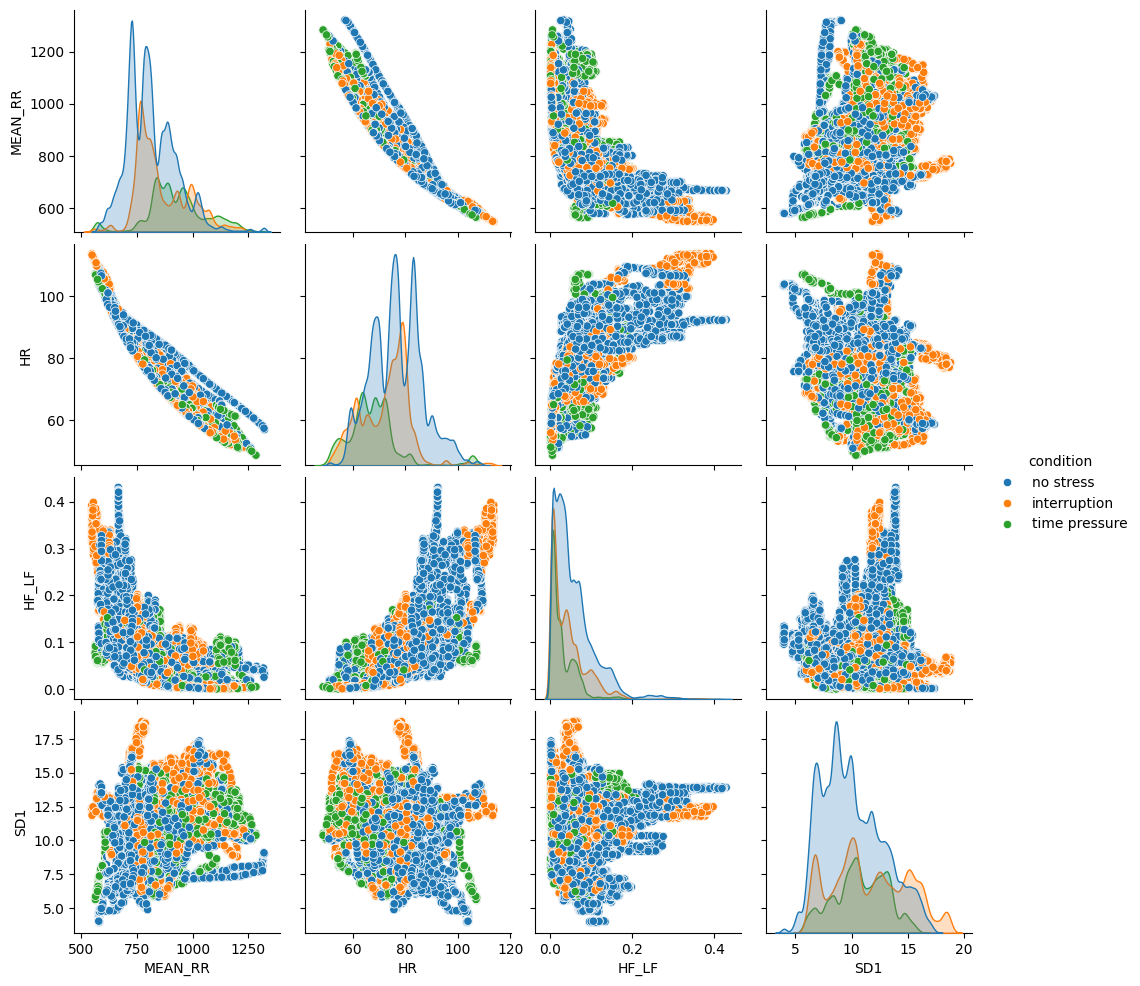

In [11]:
# Como estou rodando online, irei plotar somente com cinco preditores
variaveis_selecionadas = ['MEAN_RR', 'HR', 'HF_LF', 'SD1', 'condition']

df_subset = df_completo[variaveis_selecionadas]

sns.pairplot(df_subset, hue='condition')
plt.show()

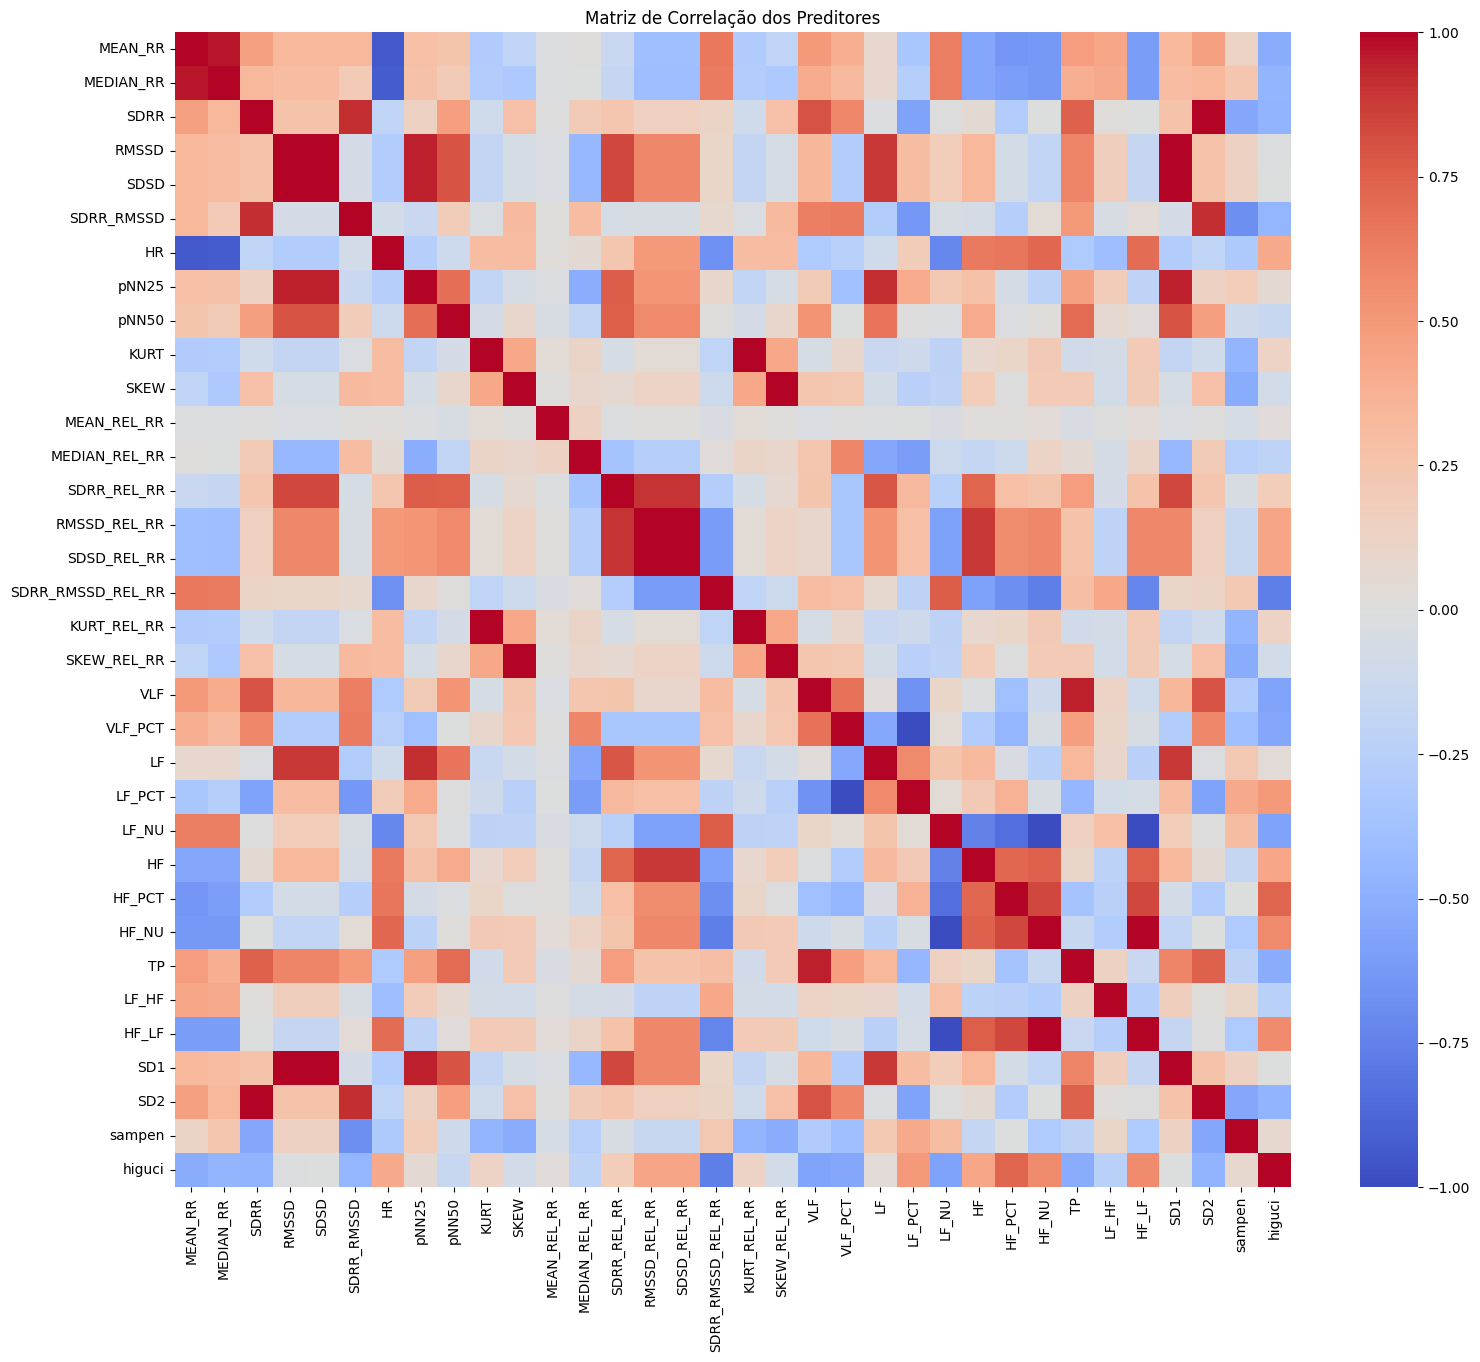

In [12]:
# Usando o DataFrame numérico da etapa 2
df_numerico = df_completo.drop(columns=['uuid', 'datasetId', 'condition'])

# Montar matriz de correlação
matriz_corr = df_numerico.corr()

# Plotar mapa de calor
plt.figure(figsize=(18, 15))
sns.heatmap(matriz_corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação dos Preditores')
plt.show()